In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
base_figura = """
\\begin{figure}[!htbp]
    \centering
    \includegraphics[width=\\textwidth]
    {plantilla/
"""



In [5]:
cantidad_parqueos = 100
df = pd.read_csv(f'Statistics.csv')
offset_imagenes = 0

graficas = True

In [6]:
# Convertimos la columna 'Parametros' de string a diccionario
df['Simulacion'] = df['Parametros']
df['Parametros'] = df['Parametros'].apply(eval)

# Expande los valores de los parámetros en columnas separadas
df = df.join(pd.DataFrame(df['Parametros'].tolist(), index=df.index))

In [7]:
# Agrupar por 'Cantidad alumnos' y 'Parametros'
grupos = df.groupby(['Cantidad alumnos', 'Parametros'])

In [8]:
rangos = {'yellow': [390, 780], 'orange': [600, 990], 'red': [930, 1320], 'skyblue': [390, 1320]}


 

def convertir_minutos_a_horas(minutos):
    horas = minutos // 60
    minutos_restantes = minutos % 60
    
    pm_am = "am" if horas < 12 else "pm"
    
    return f"{horas}:{minutos_restantes:02d} {pm_am}"


def hora_segun_color(color):
    color = color.lower()
    hora_inicio =convertir_minutos_a_horas(rangos[color][0])
    hora_fin = convertir_minutos_a_horas(rangos[color][1])
    return f"Cantidad alumnos de {hora_inicio} - {hora_fin}"

def generar_texto_horario(cantidades):
    resultado = []
    for color, rango in rangos.items():
        inicio_hora = convertir_minutos_a_horas(rango[0])
        fin_hora = convertir_minutos_a_horas(rango[1])
        cantidad = cantidades[color]
        resultado.append(f"{inicio_hora} - {fin_hora} : {cantidad}")
    return ", ".join(resultado)


In [9]:
# Agrupar por la cantidad de alumnos en intervalos de 5 (100, 105, 110, ...)
grouped = df.groupby(['Cantidad alumnos', 'yellow', 'orange', 'red', 'skyblue']).agg({
    'Carros sin antender': ['mean','min'],
    'Almorzaron': 'mean',
    'Día': 'count',  # Para contar la cantidad de días en cada simulación
    'Salidas por periodos libres': 'mean',
}).reset_index()

grouped.columns = ['Cantidad alumnos', 'yellow', 'orange', 'red', 'skyblue', 'Carros sin antender mean', 'Carros sin antender min', 'Almorzaron mean', 'Día', 'Salidas por periodos libres mean']


In [10]:
top1 = grouped[grouped['Carros sin antender mean'] == 0].sort_values('Cantidad alumnos',ascending=False).head(1)

Datos del grupo 1: 150 simulaciones


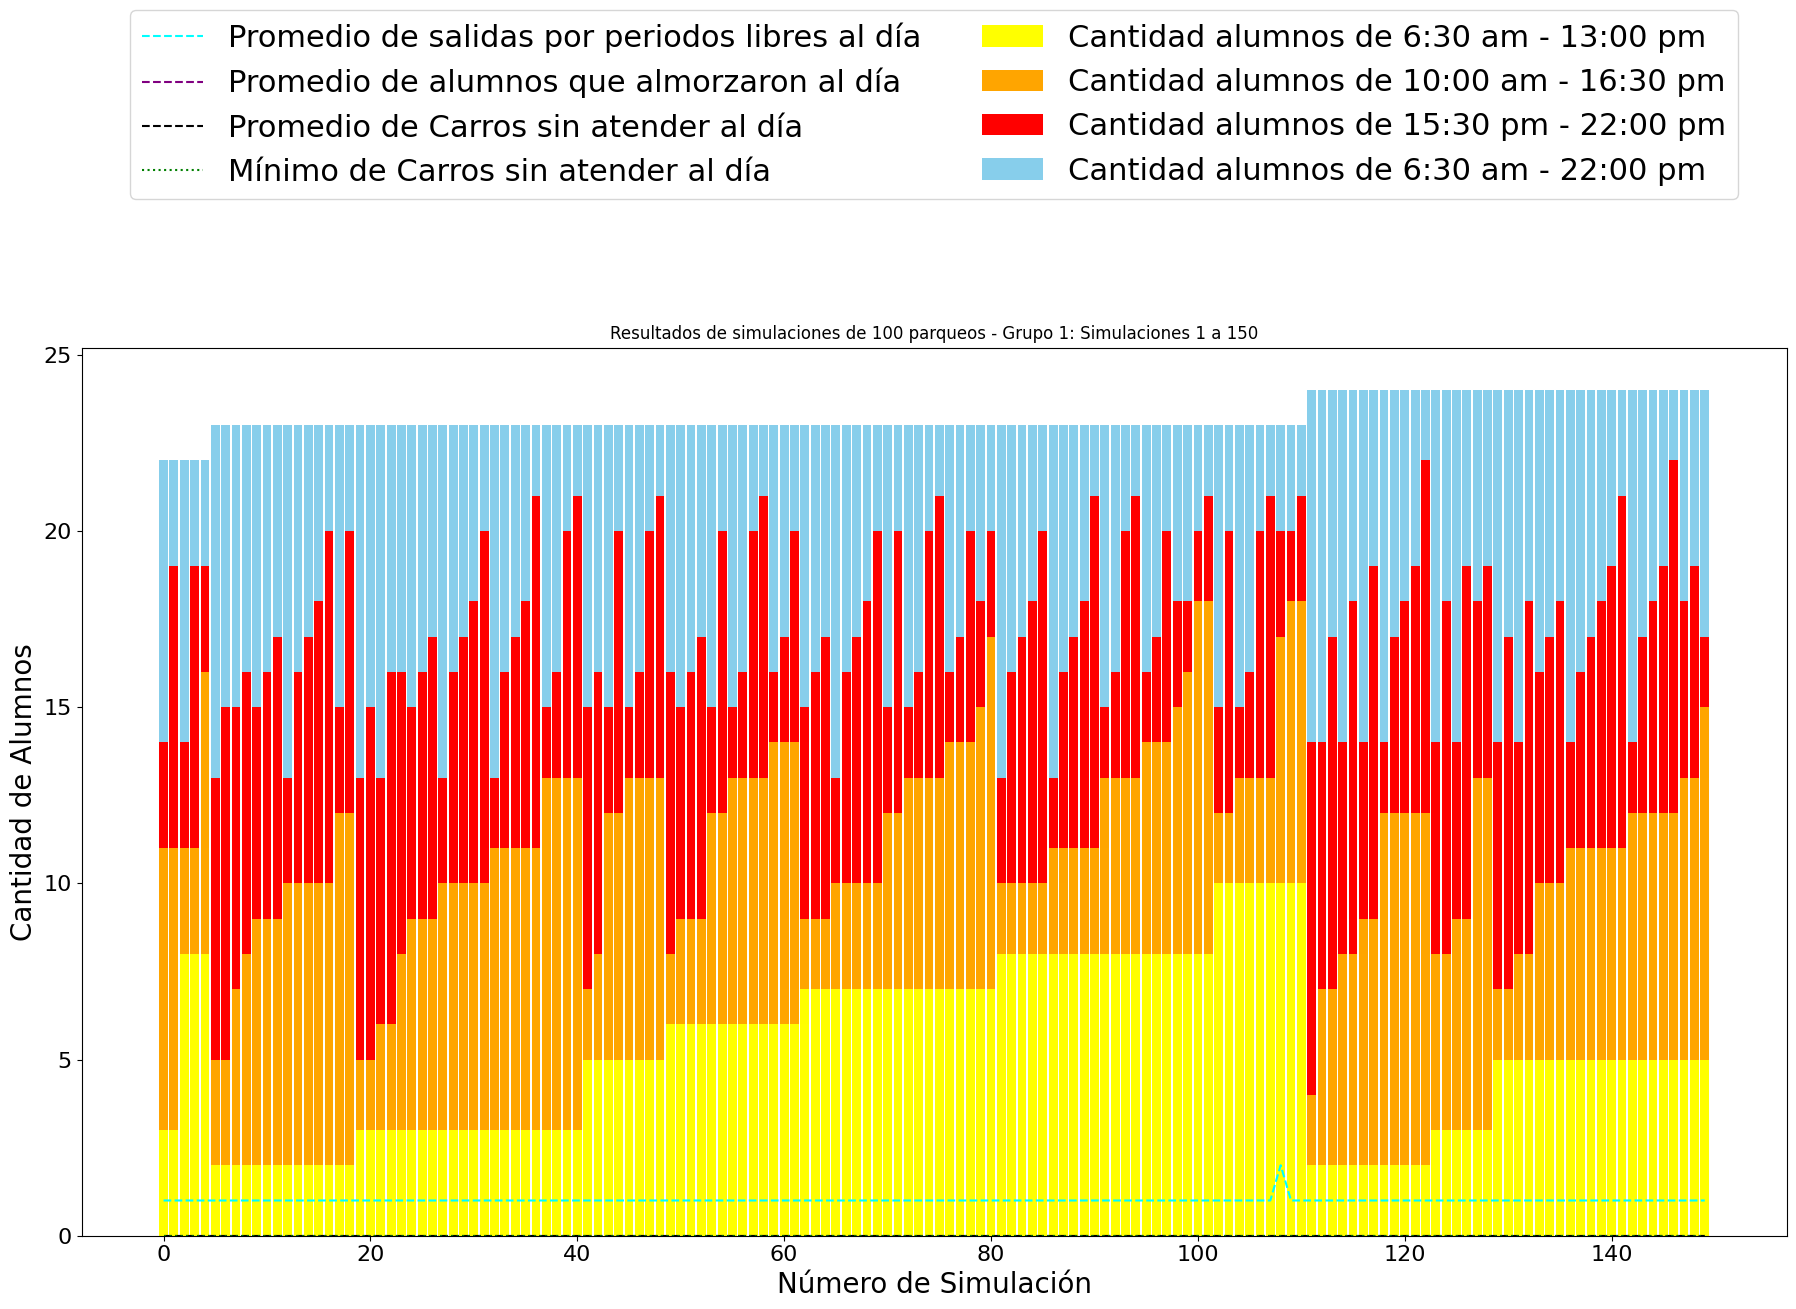

Datos del grupo 2: 150 simulaciones


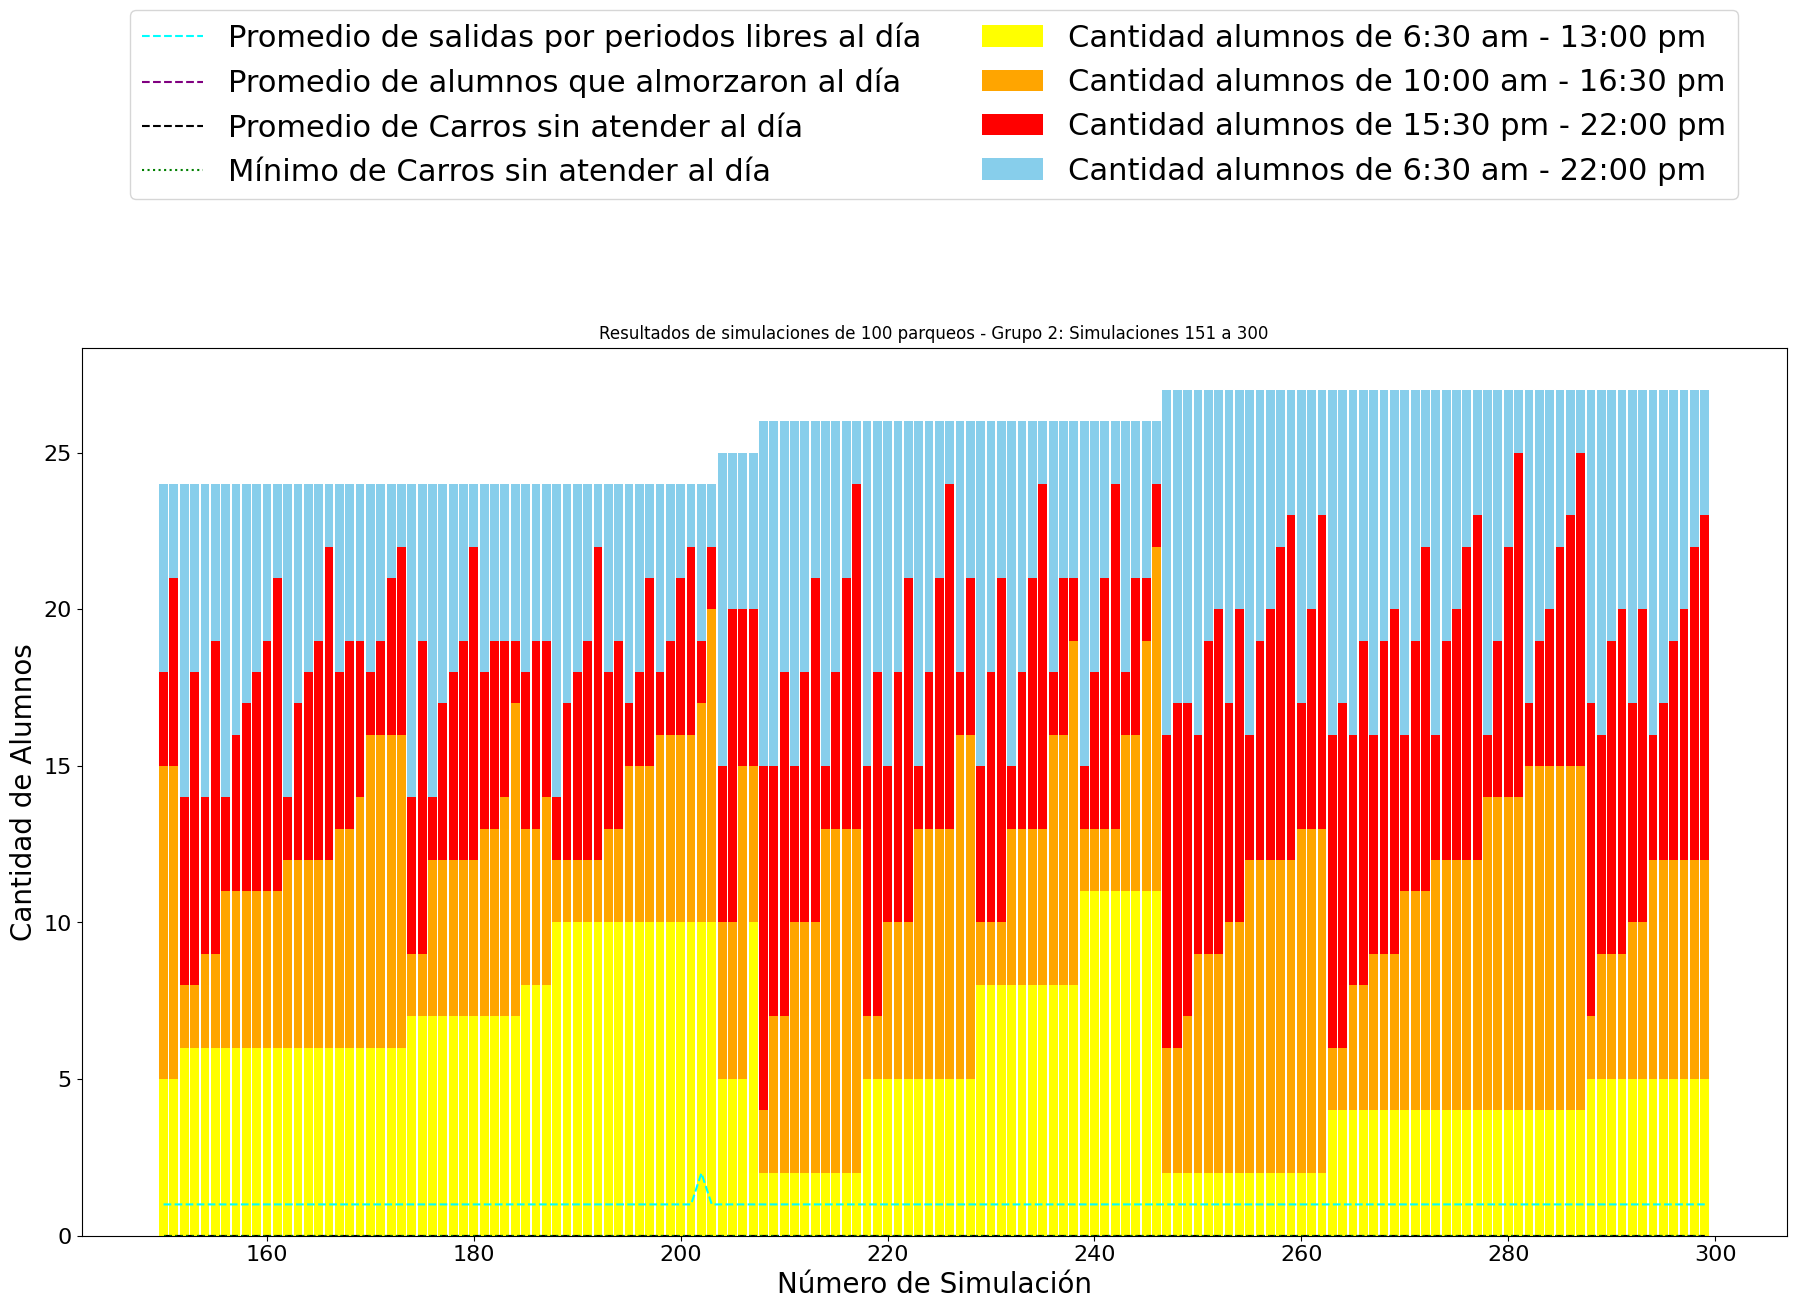

Datos del grupo 3: 150 simulaciones


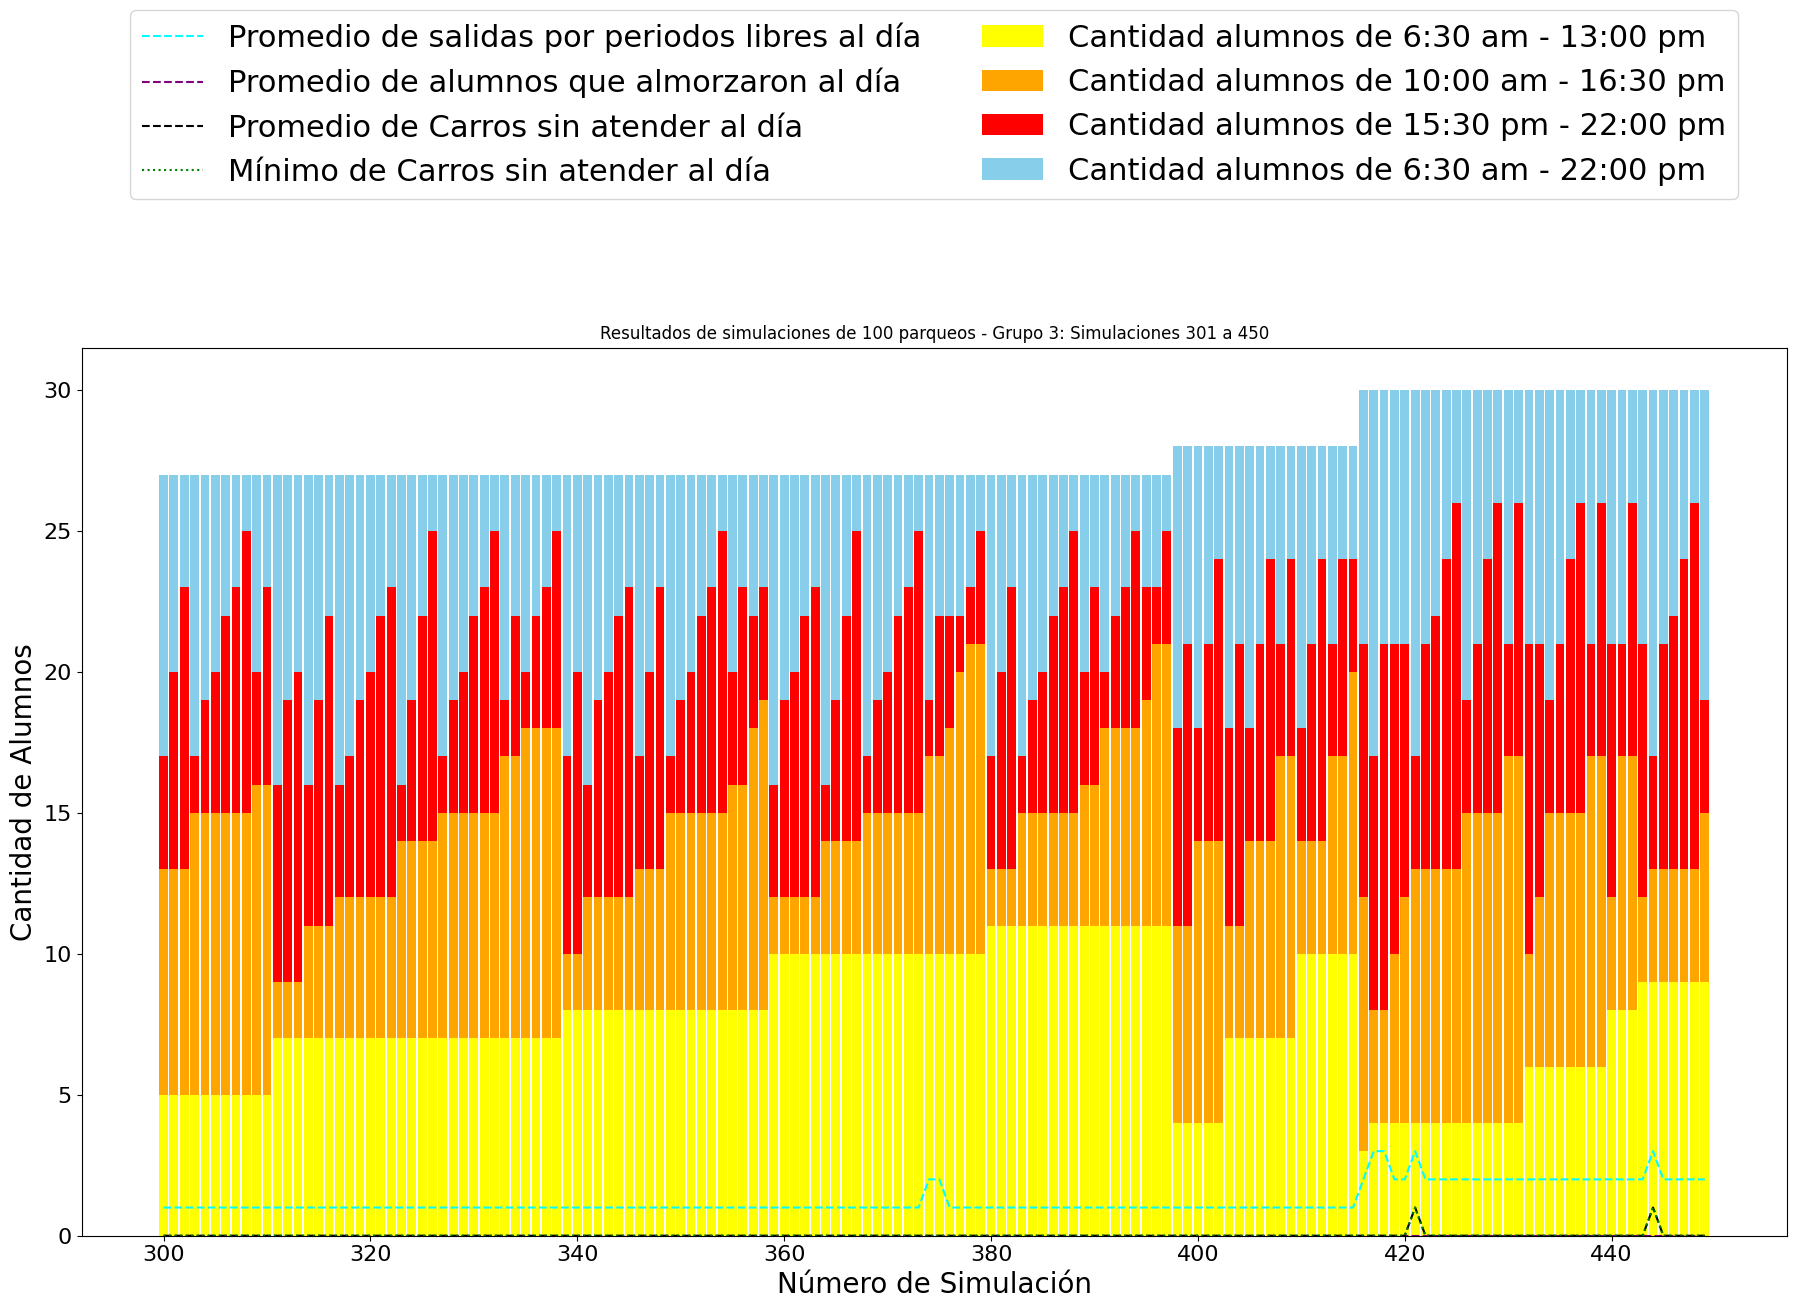

Datos del grupo 4: 150 simulaciones


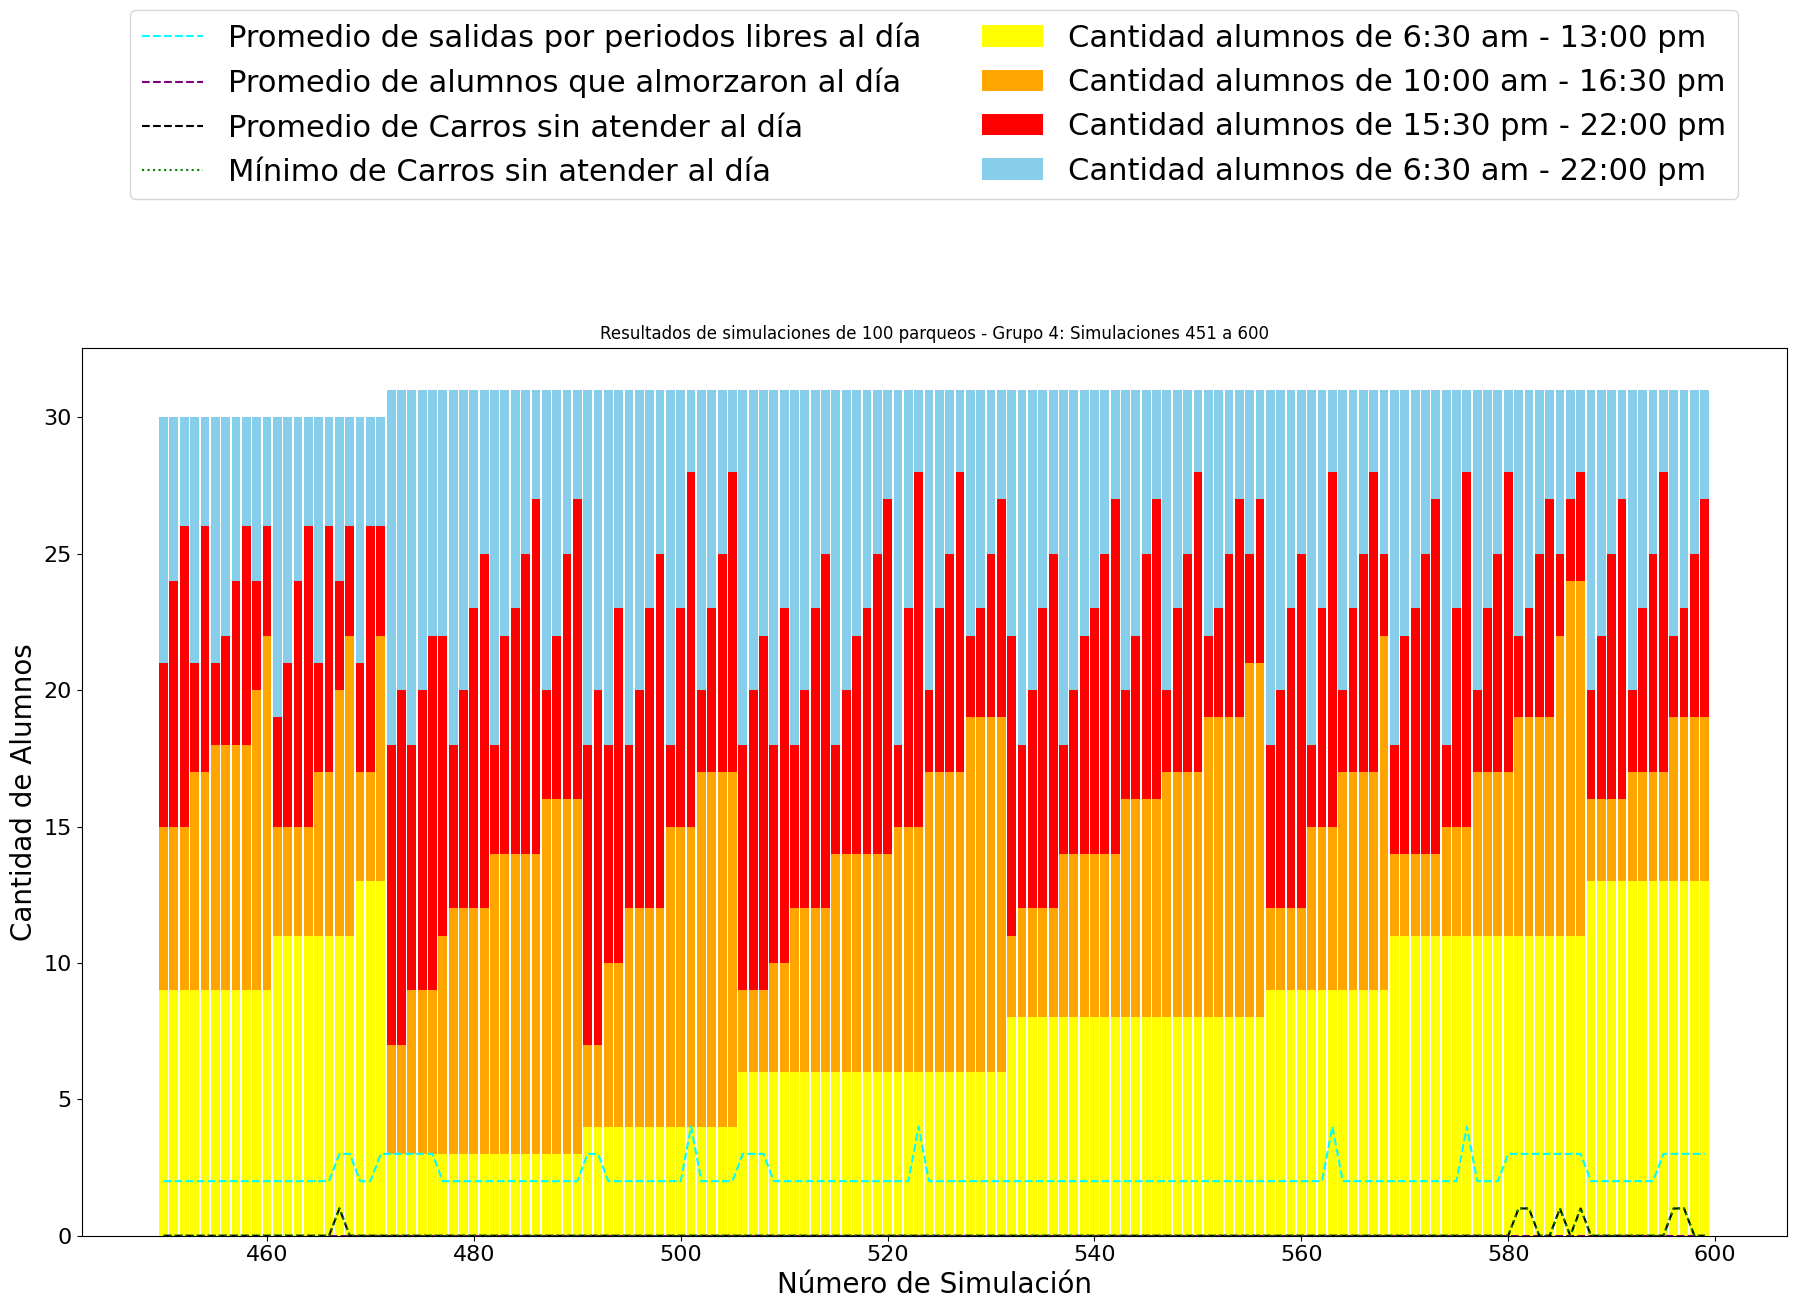

Datos del grupo 5: 150 simulaciones


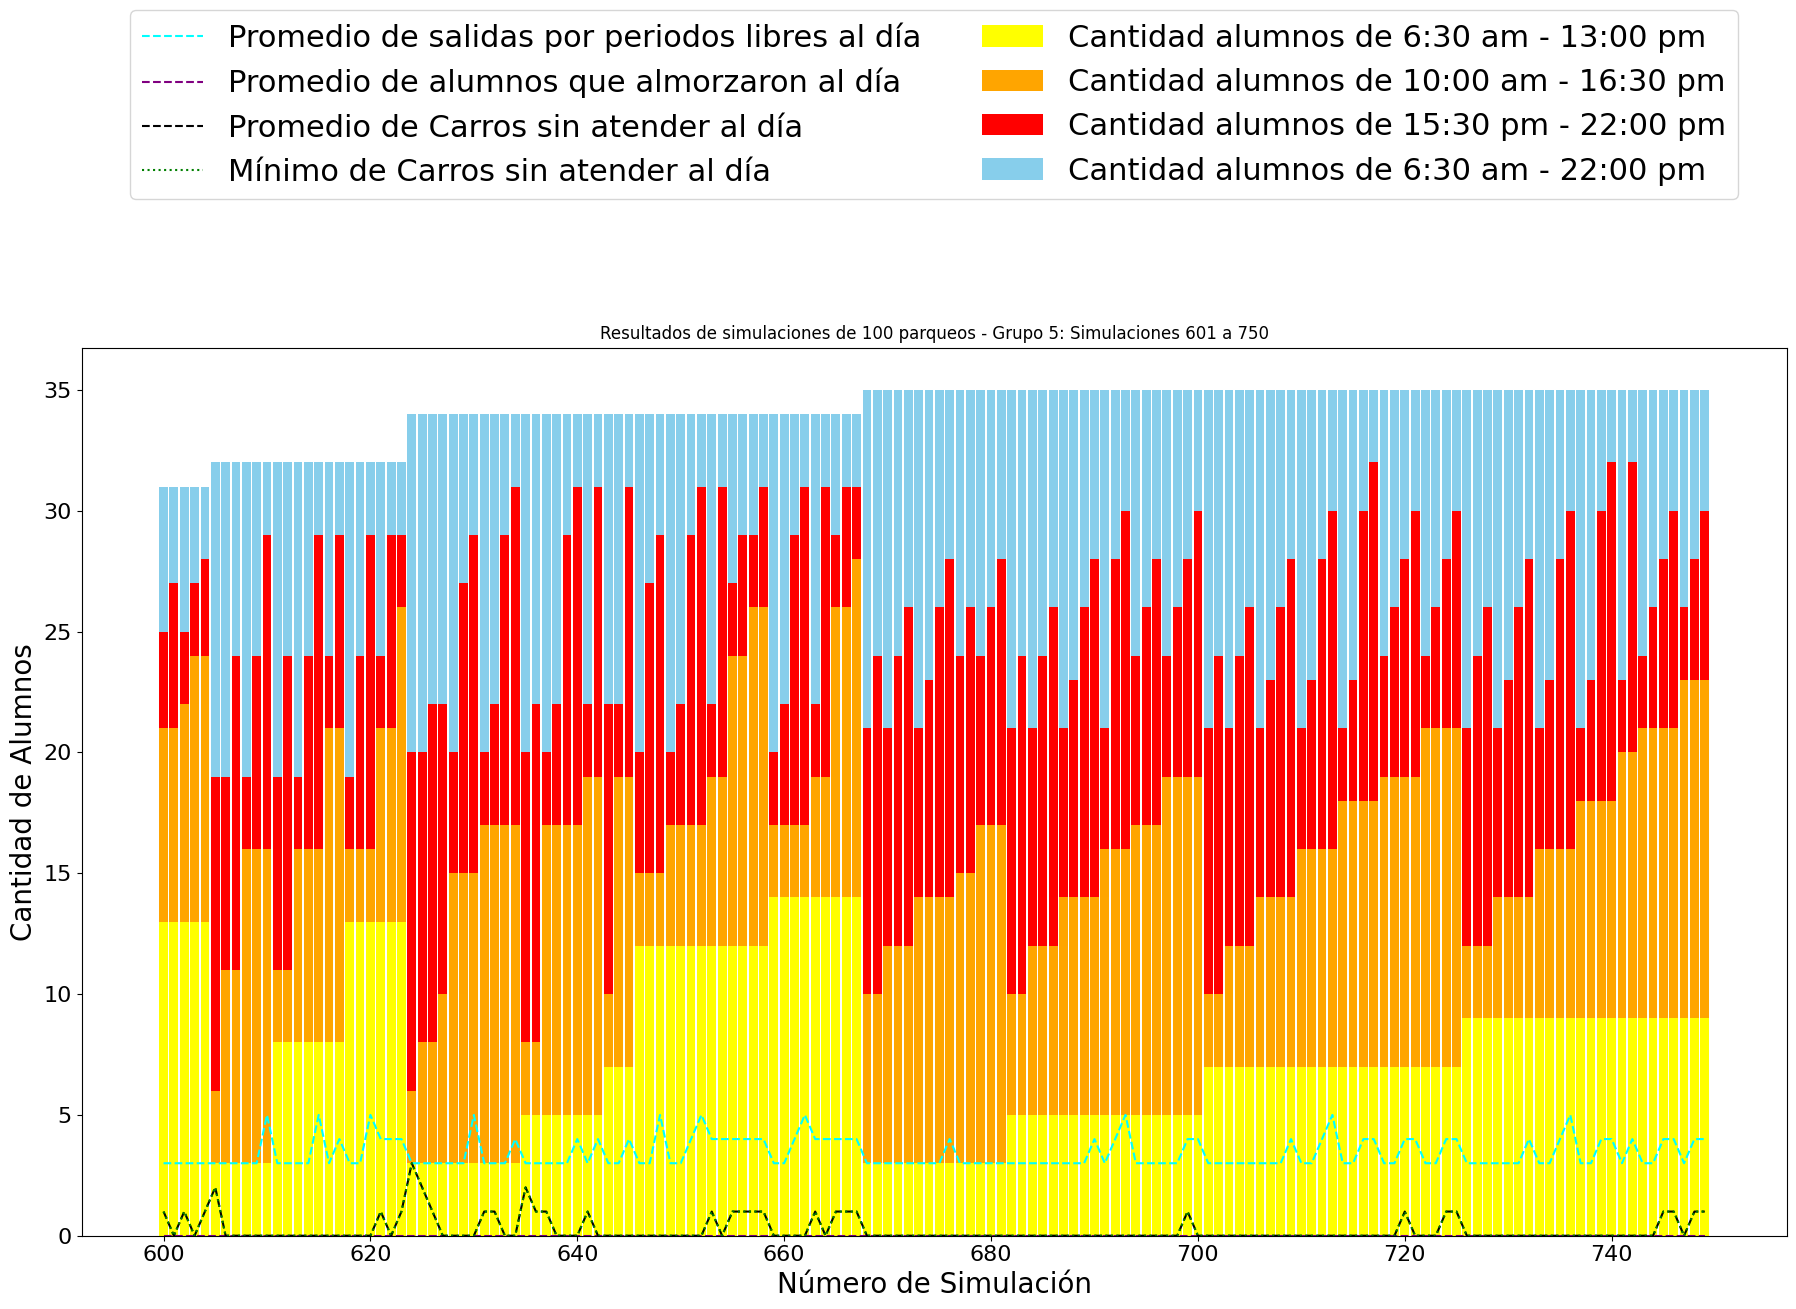

Datos del grupo 6: 150 simulaciones


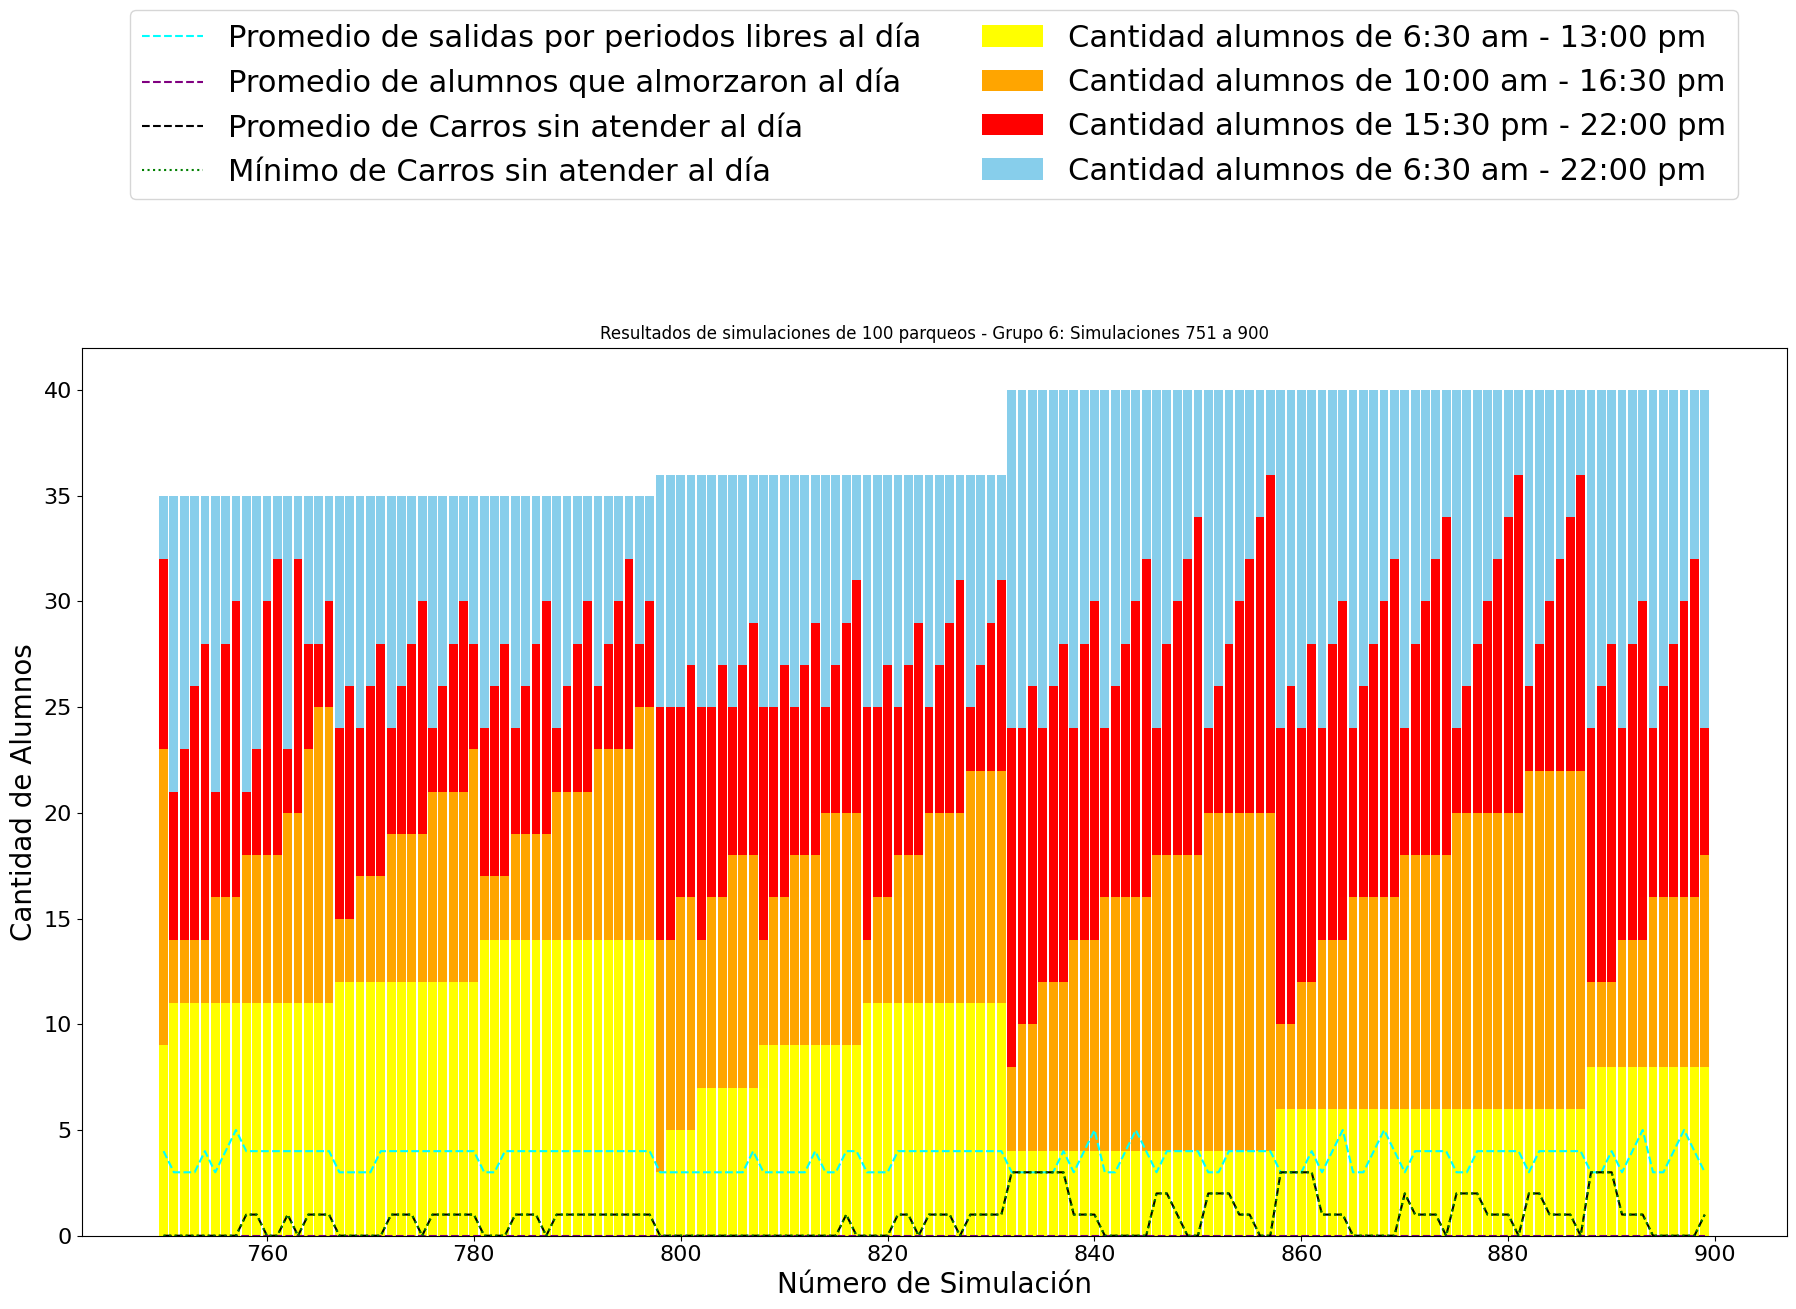

Datos del grupo 7: 150 simulaciones


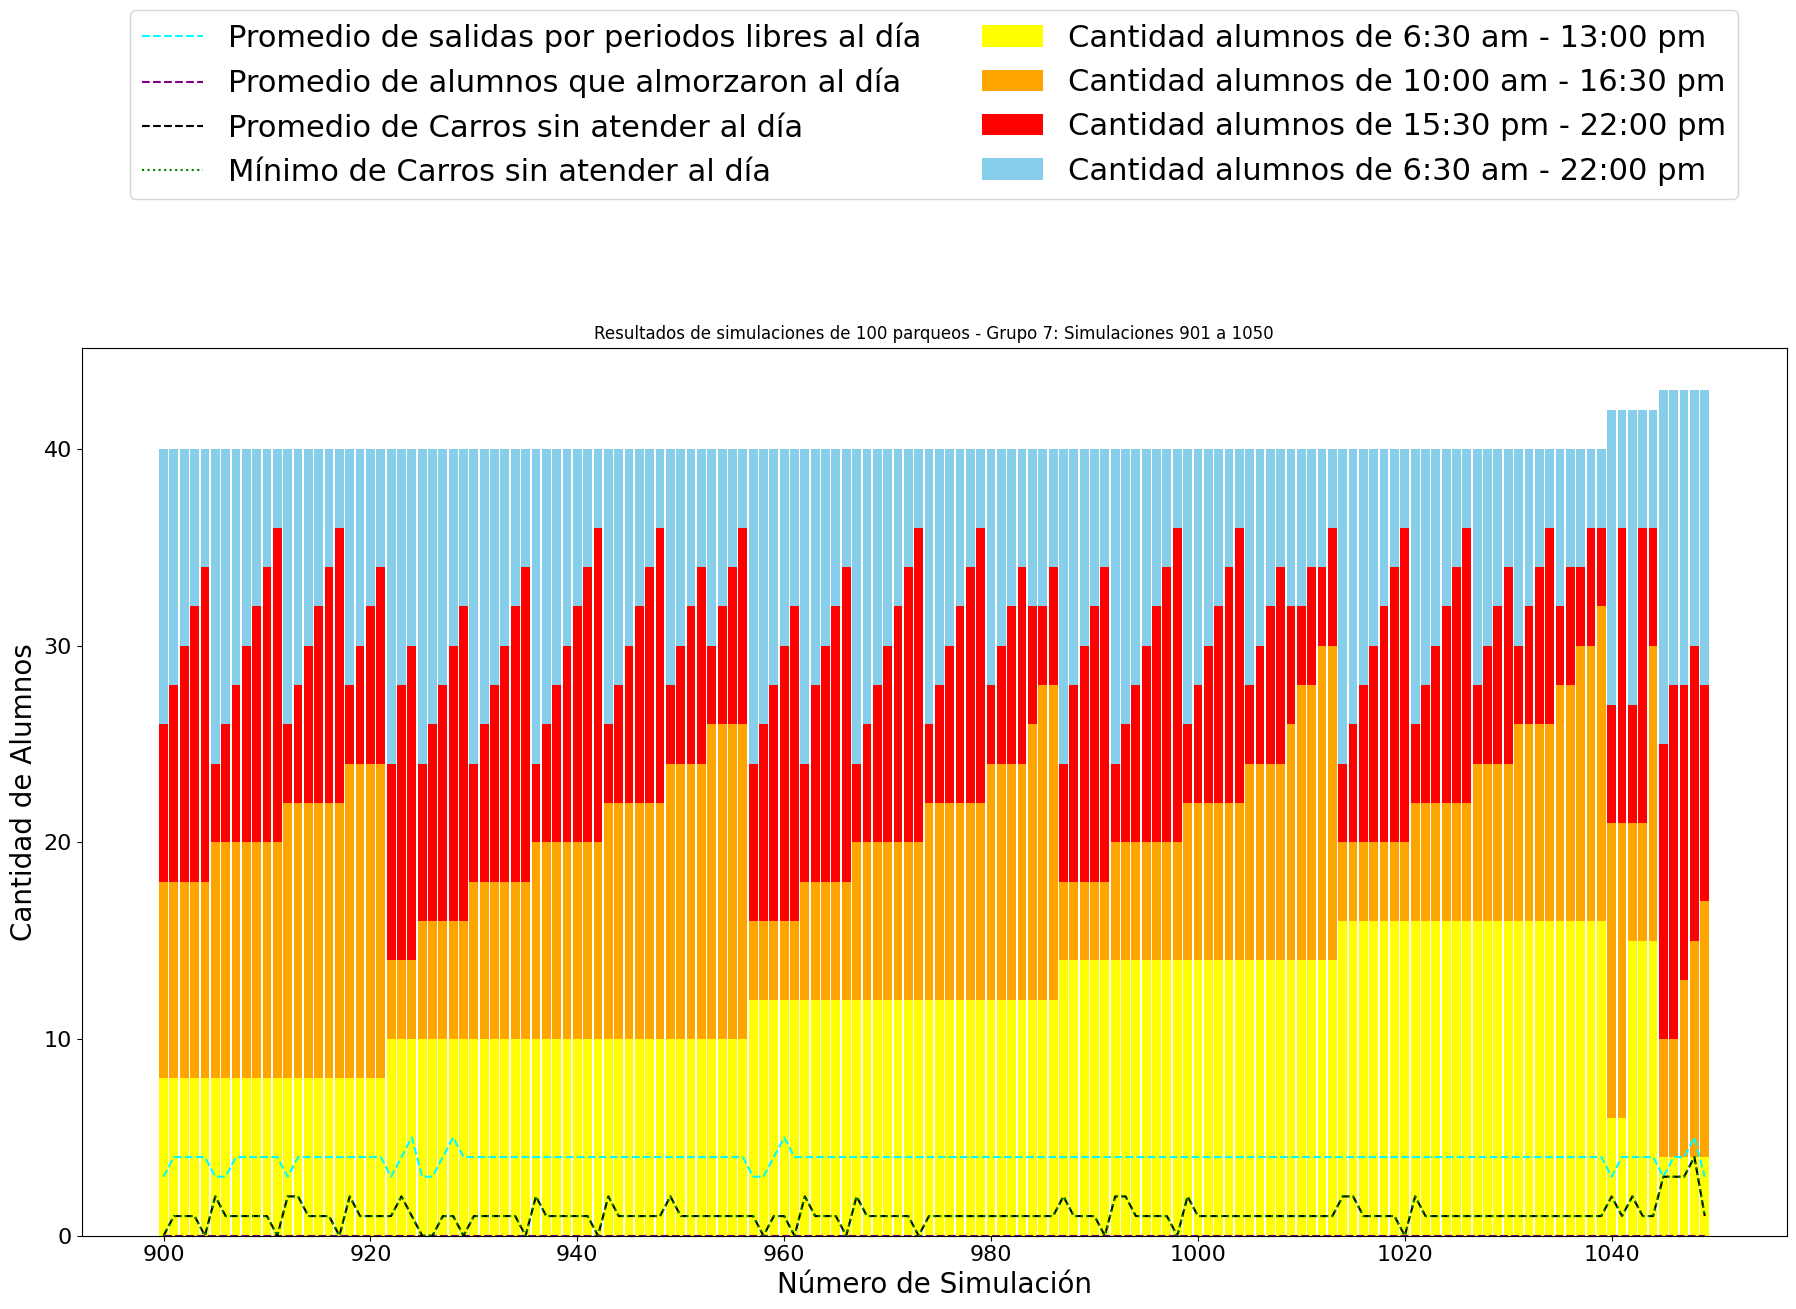

Datos del grupo 8: 150 simulaciones


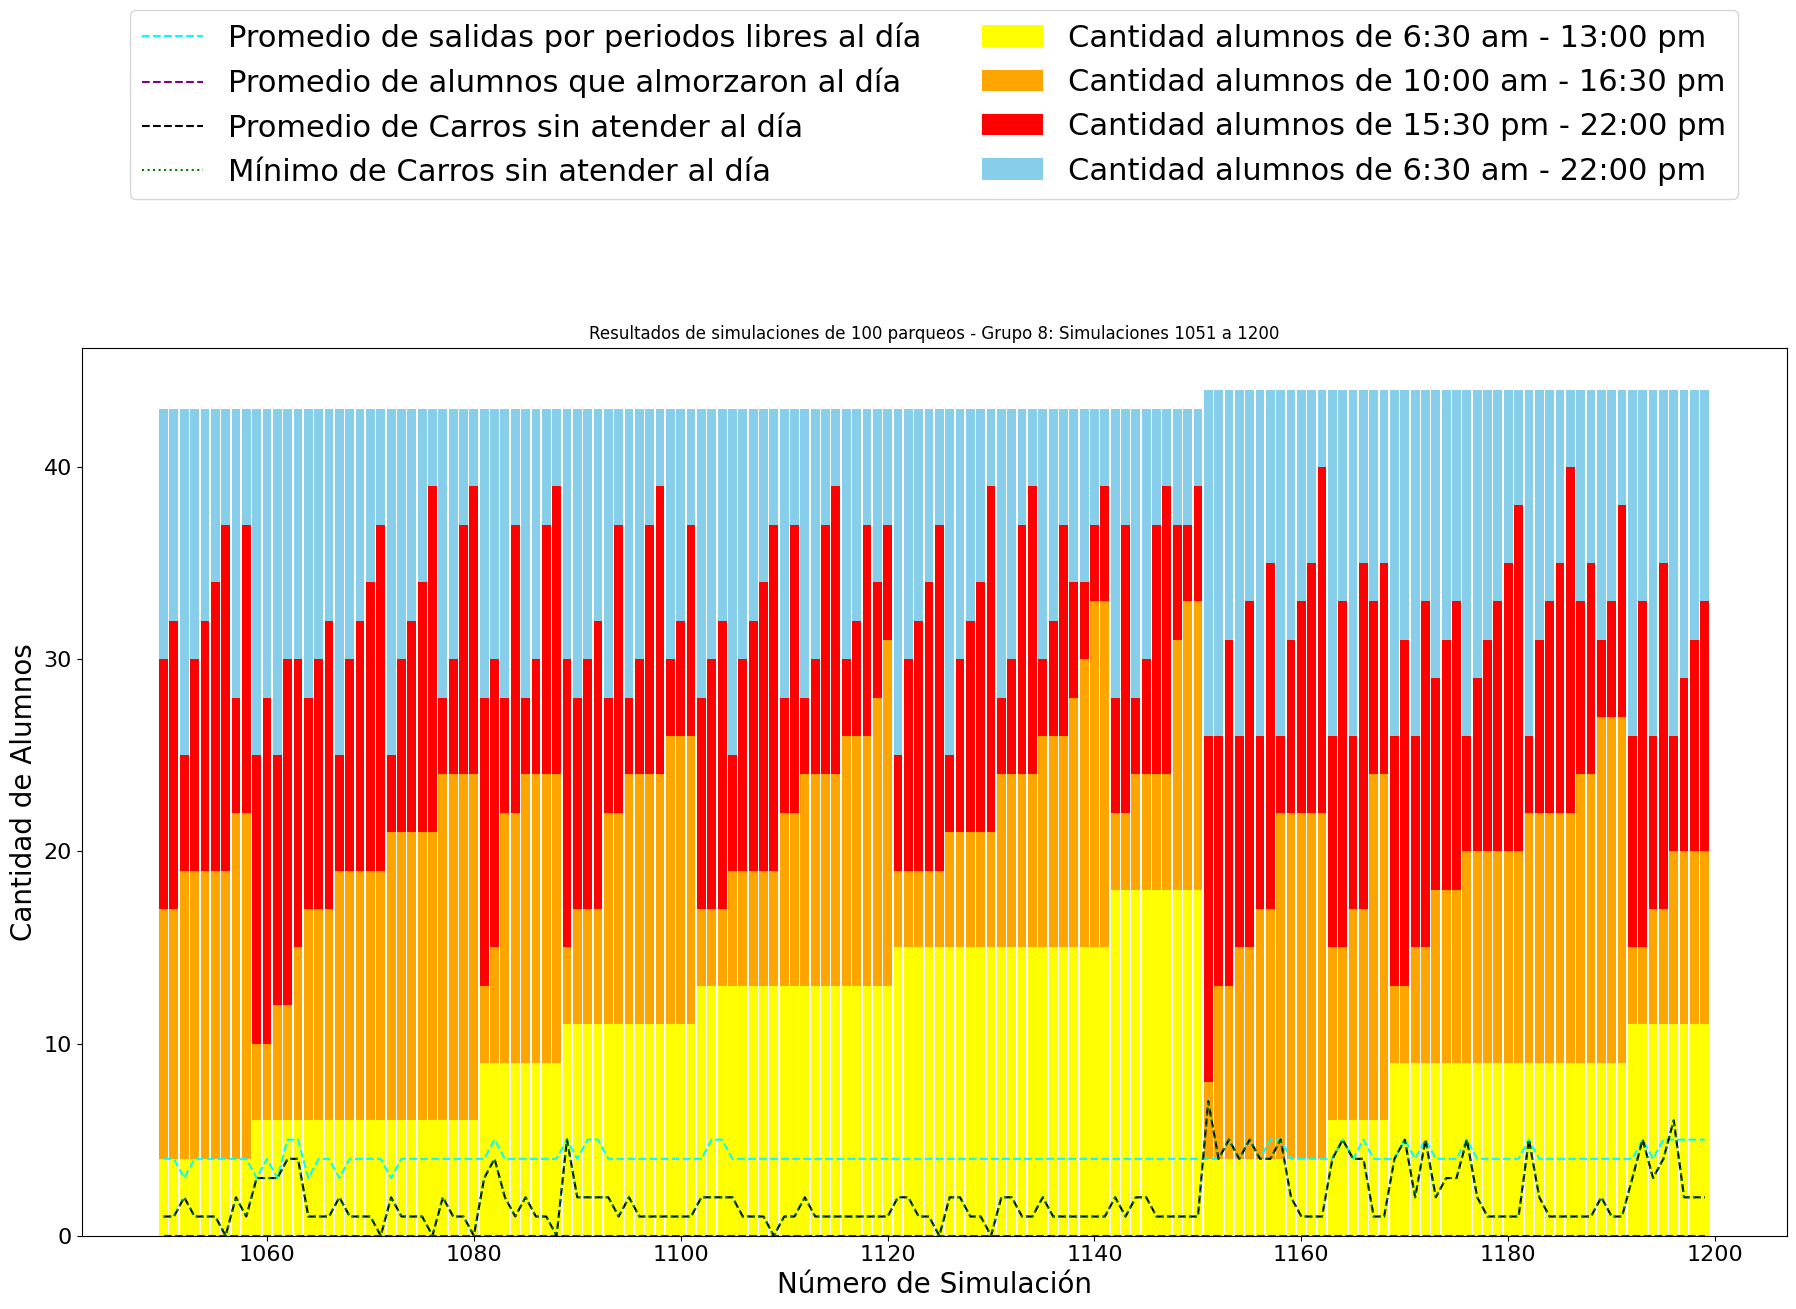

Datos del grupo 9: 150 simulaciones


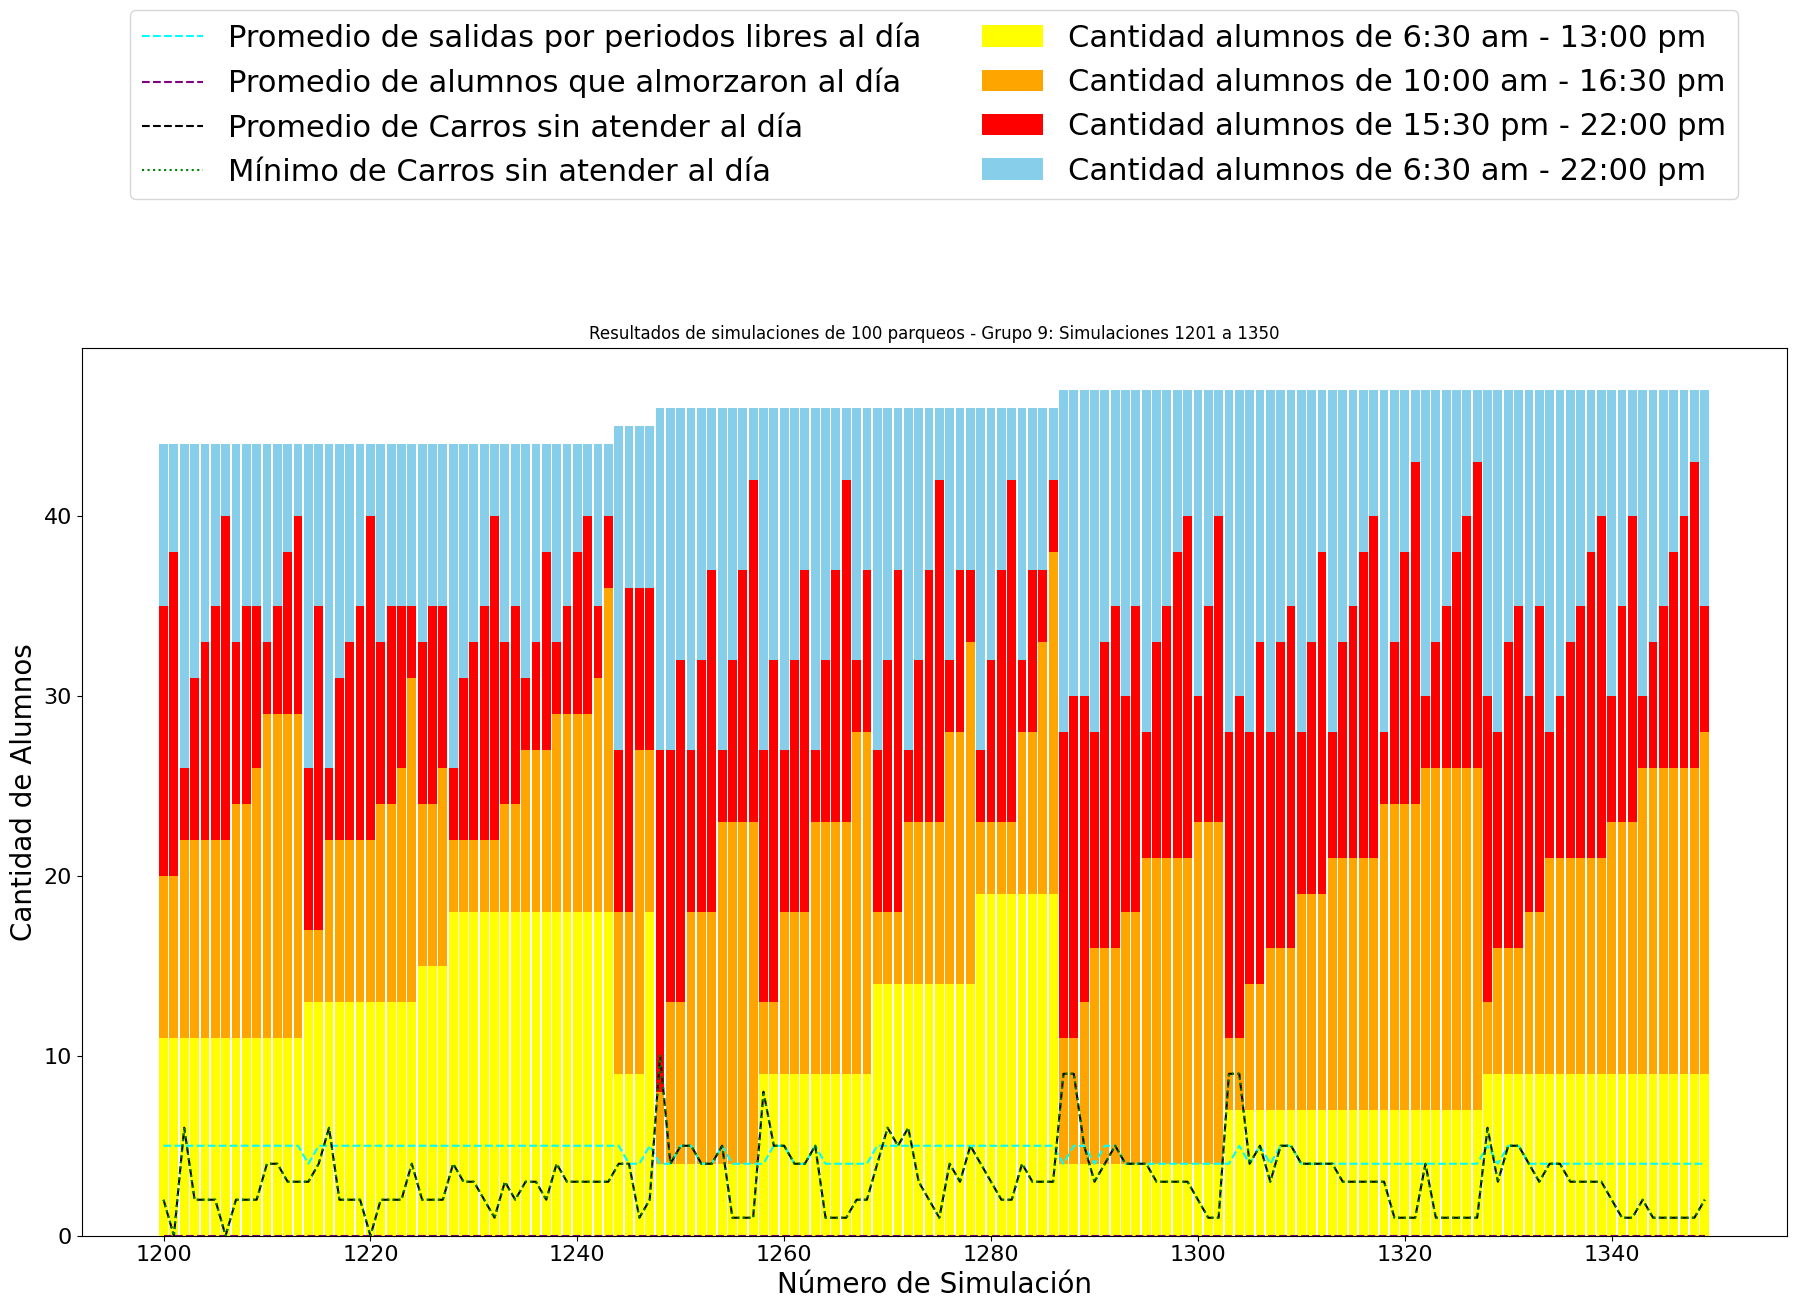

Datos del grupo 10: 150 simulaciones


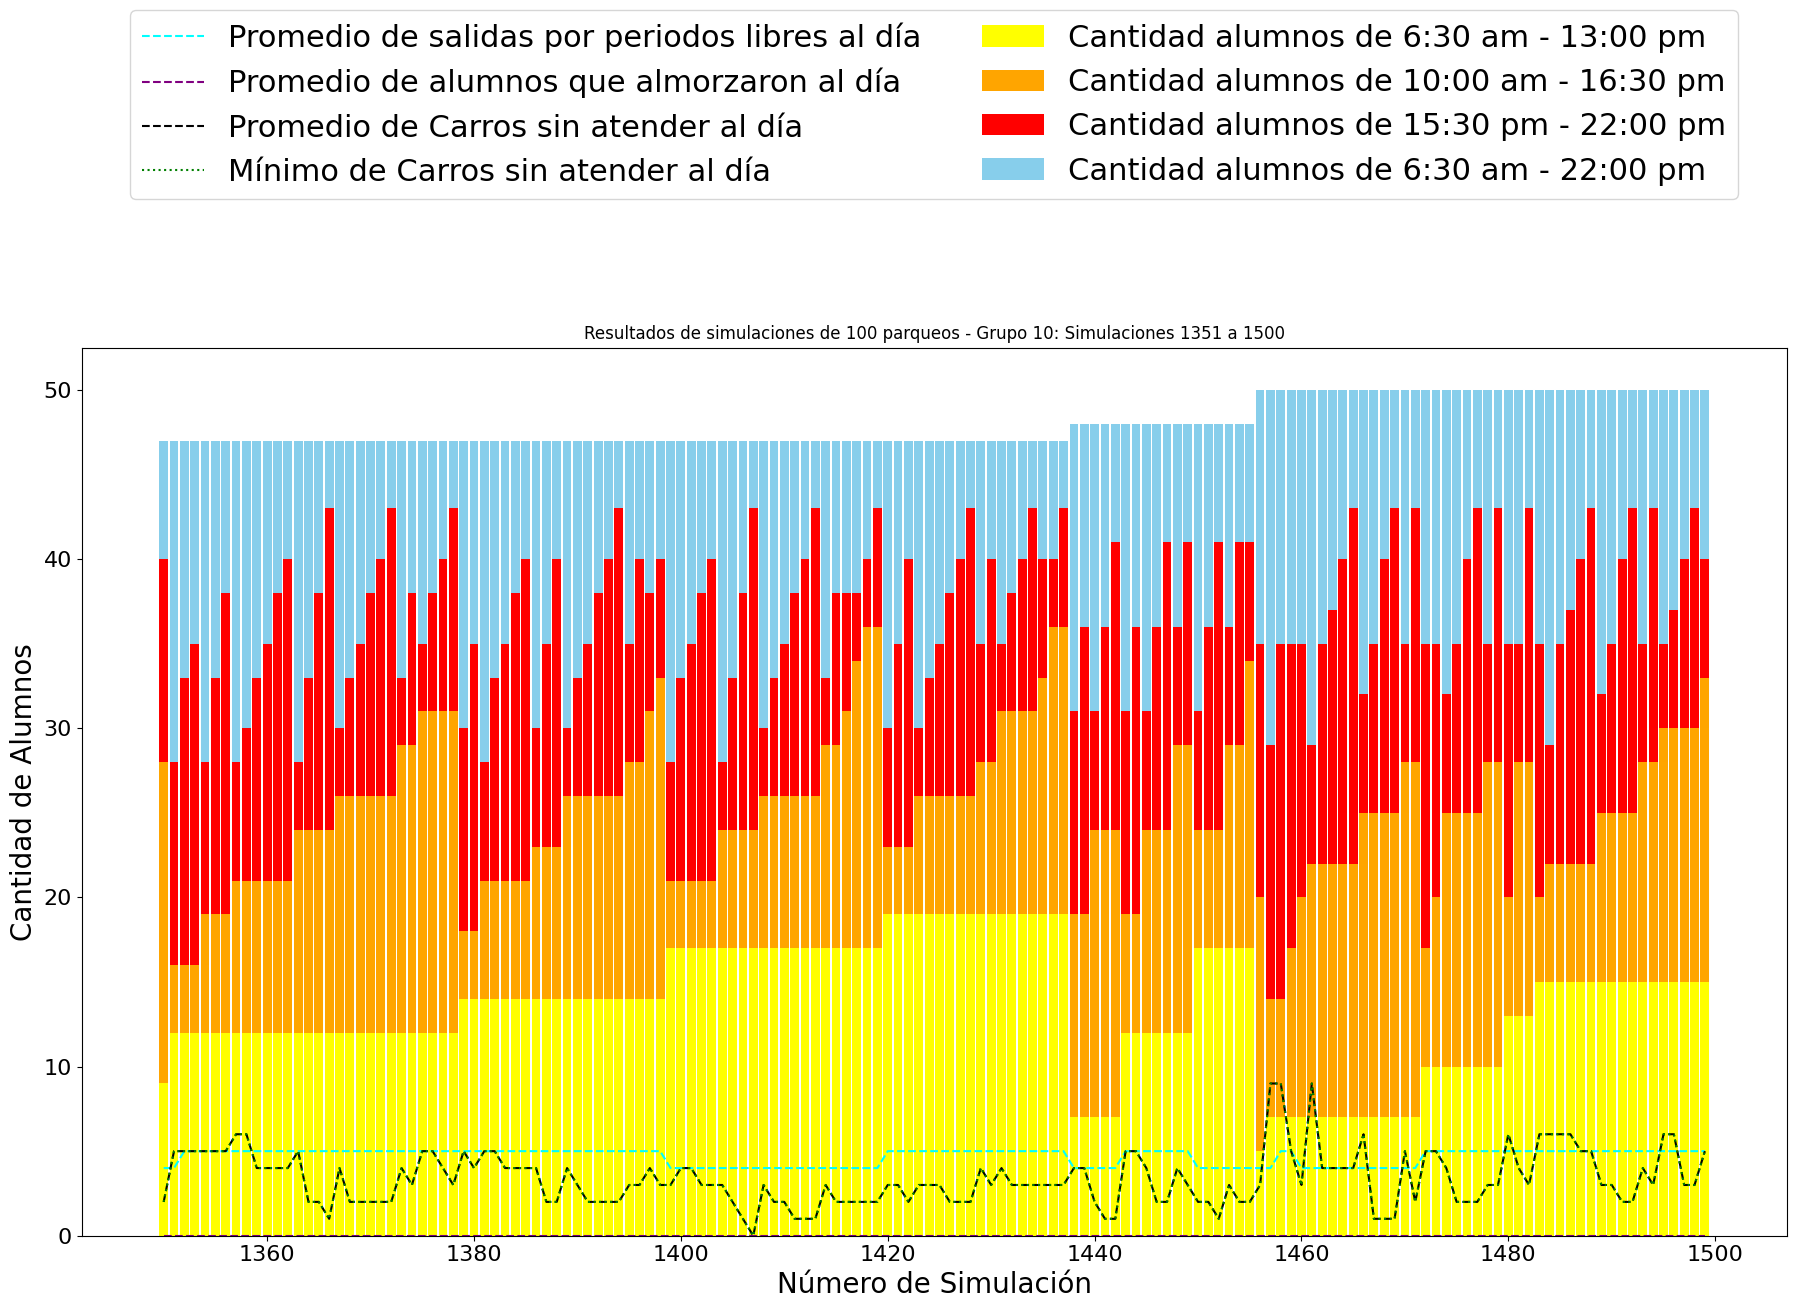

Datos del grupo 11: 150 simulaciones


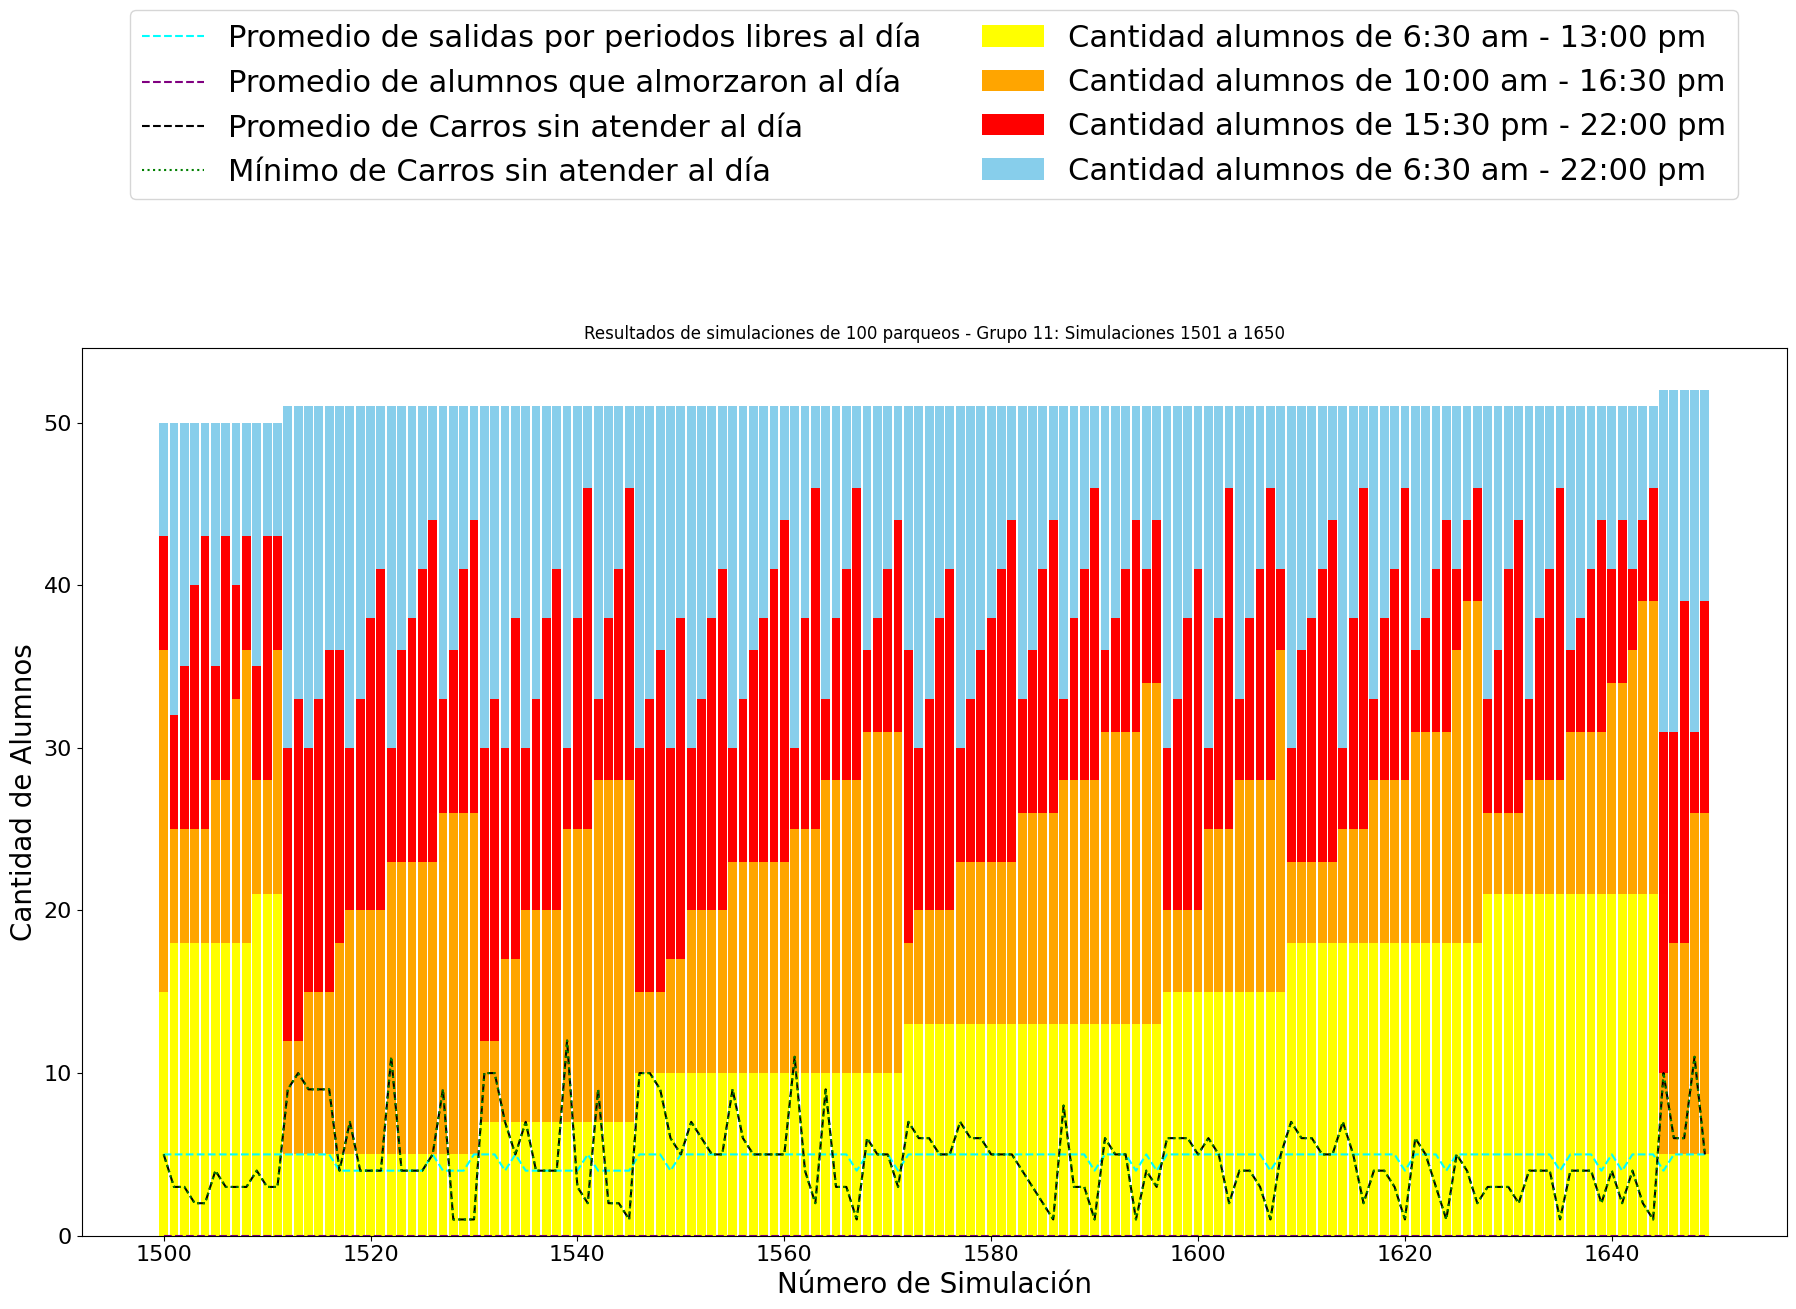

Datos del grupo 12: 150 simulaciones


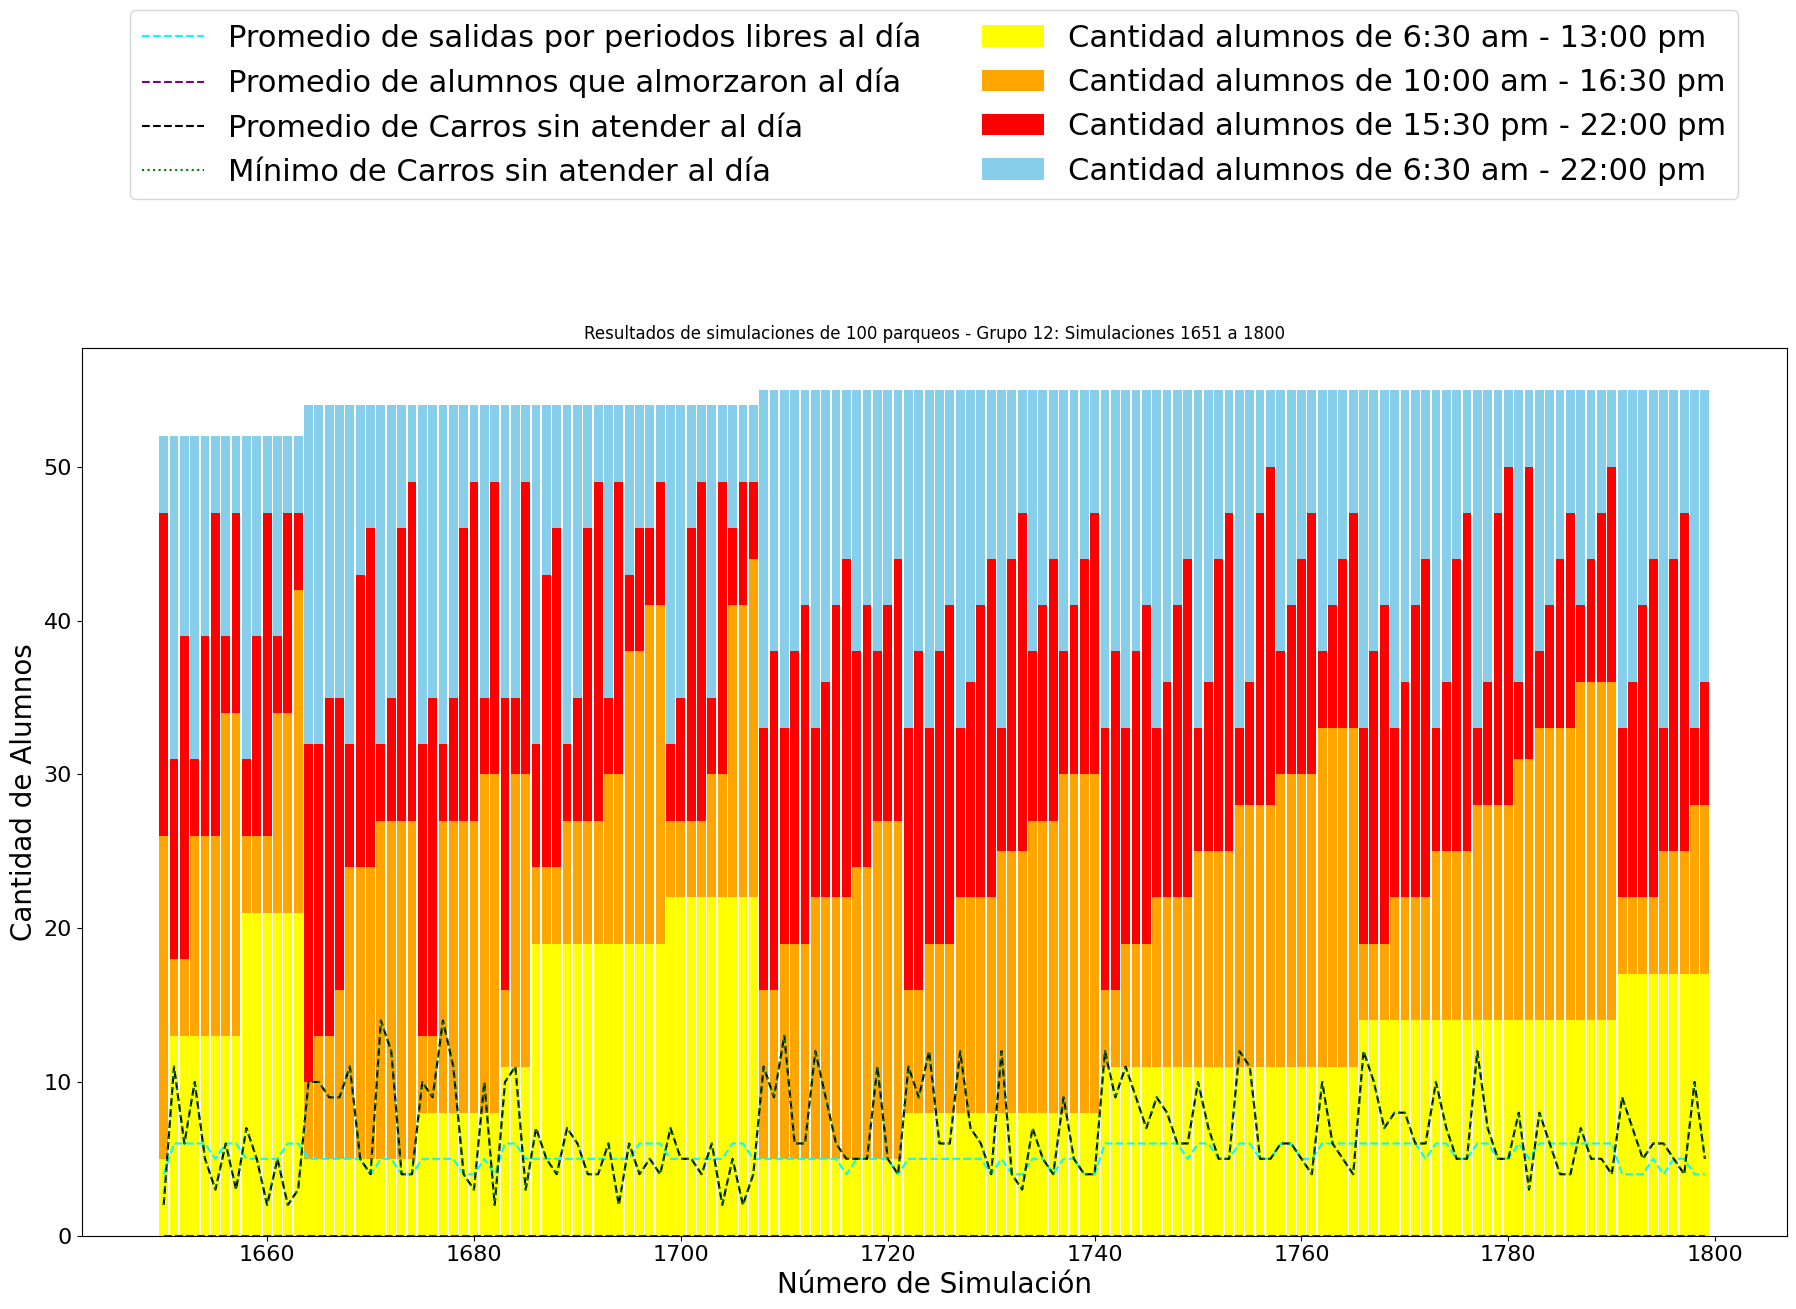

Datos del grupo 13: 150 simulaciones


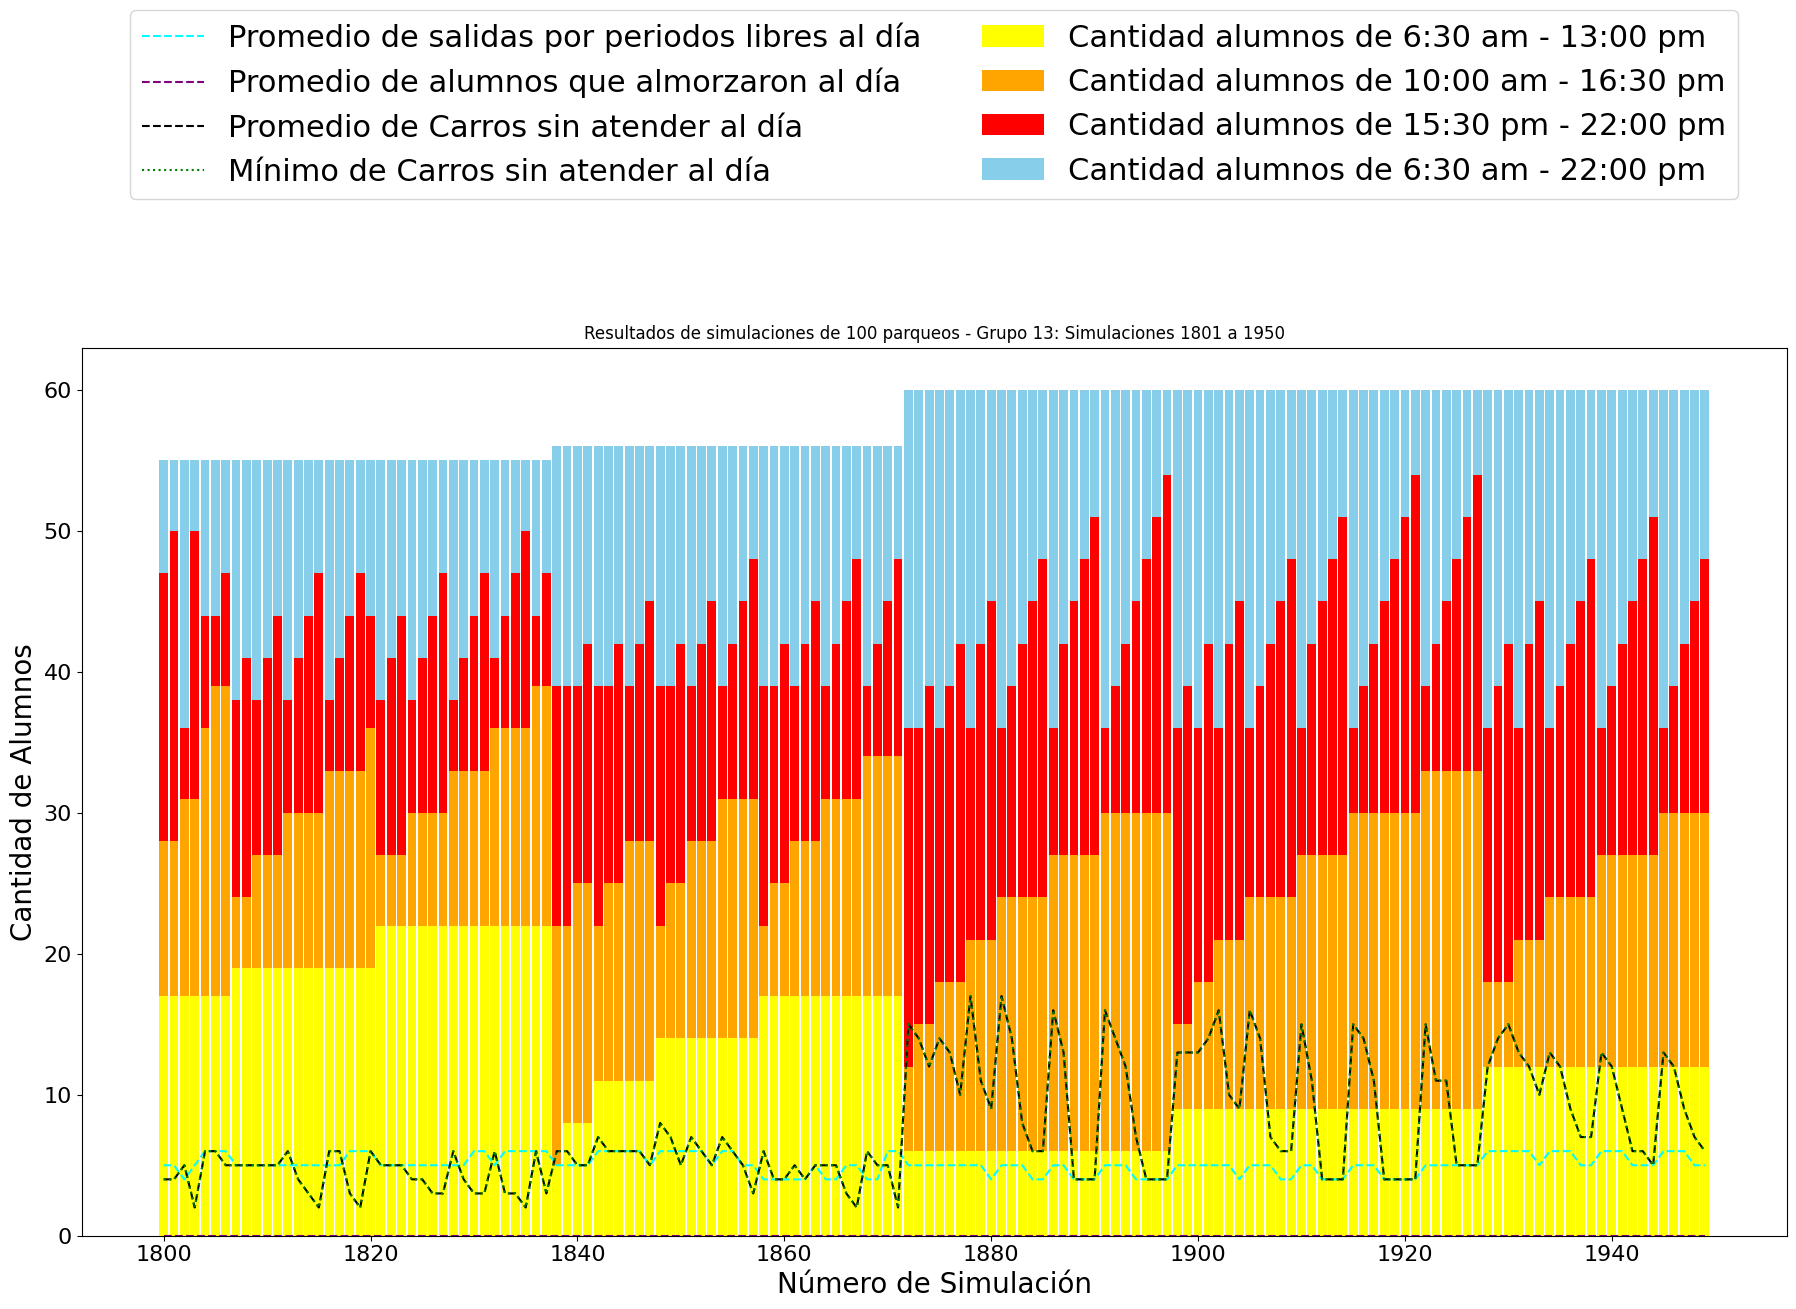

Datos del grupo 14: 130 simulaciones


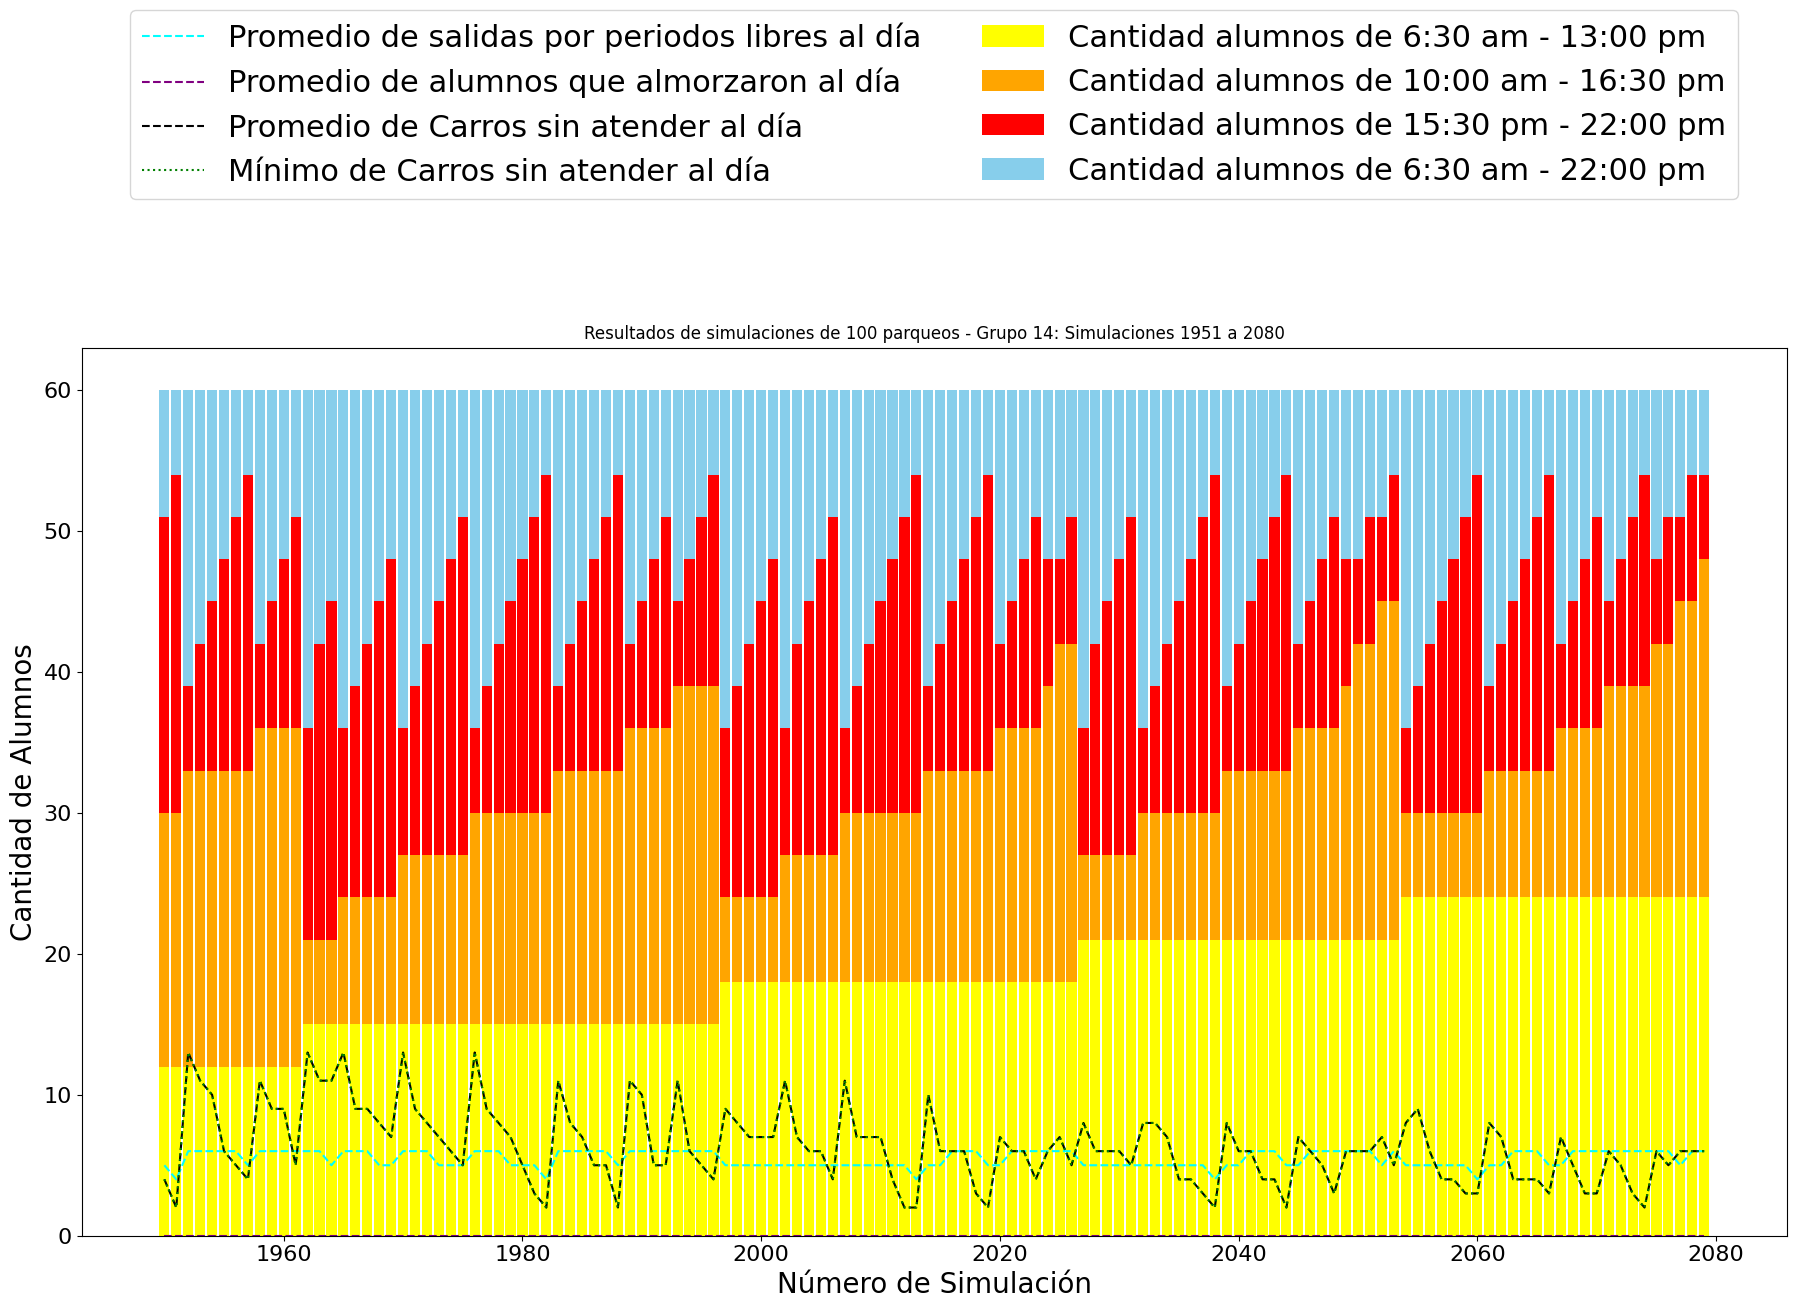

In [ ]:
import matplotlib.pyplot as plt

group_size = 150  # Tamaño del grupo de simulaciones a graficar
total_simulations = len(grouped)  # Número total de simulaciones
num_groups = total_simulations // group_size + 1  # Número de gráficos a generar

generacion_resultados = ""

for i in range(num_groups):
    if not graficas:
        break
    
    start = i * group_size
    end = start + group_size
    ordered_grouped = grouped.iloc[start:end]

    if len(ordered_grouped) == 0:
        break  # Salir si no hay más datos

    # Crear el gráfico de barras apiladas
    plt.figure(figsize=(22, 12))
    bar_width = 0.85

    print(f"Datos del grupo {i + 1}: {len(ordered_grouped)} simulaciones")

    # Apilar las barras para cada parámetro
    plt.bar(ordered_grouped.index, ordered_grouped['yellow'], bar_width, label=hora_segun_color("yellow"), color='yellow')
    plt.bar(ordered_grouped.index, ordered_grouped['orange'], bar_width, bottom=ordered_grouped['yellow'], label=hora_segun_color('Orange'), color='orange')
    plt.bar(ordered_grouped.index, ordered_grouped['red'], bar_width, bottom=ordered_grouped['yellow'] + ordered_grouped['orange'], label=hora_segun_color('Red'), color='red')
    plt.bar(ordered_grouped.index, ordered_grouped['skyblue'], bar_width, bottom=ordered_grouped['yellow'] + ordered_grouped['orange'] + ordered_grouped['red'], label=hora_segun_color('Skyblue'), color='skyblue')

    # Graficar las líneas de promedio y mínimo
    plt.plot(ordered_grouped.index, ordered_grouped['Salidas por periodos libres mean'], color='cyan', linestyle='dashed', label='Promedio de salidas por periodos libres al día')
    plt.plot(ordered_grouped.index, ordered_grouped['Almorzaron mean'], color='purple', linestyle='dashed', label='Promedio de alumnos que almorzaron al día')
    plt.plot(ordered_grouped.index, ordered_grouped['Carros sin antender mean'], color='black', linestyle='dashed', label='Promedio de Carros sin atender al día')
    plt.plot(ordered_grouped.index, ordered_grouped['Carros sin antender min'], color='green', linestyle='dotted', label='Mínimo de Carros sin atender al día')

    # Etiquetas de los ejes
    plt.xlabel('Número de Simulación', fontsize=20)
    plt.ylabel('Cantidad de Alumnos', fontsize=20)
    plt.tick_params(axis='x', labelsize=16)  # Tamaño para los números del eje X
    plt.tick_params(axis='y', labelsize=16)  # Tamaño para los números del eje Y

    # Ajustar la leyenda arriba de la gráfica
    plt.legend(fontsize=22, loc='lower center', bbox_to_anchor=(0.5, 1.15), ncol=2)
    
    # Ajustar el margen superior para que la leyenda tenga espacio
    plt.subplots_adjust(top=0.85)

    # Guardar la imagen con `bbox_inches="tight"` para evitar que se corte la leyenda
    #plt.savefig(f'C:\\Users\\DELL\\Documents\\U\\Semestre 10\\Tesis\\IMAGENES RESULTADOS ANEXOS\\C{cantidad_parqueos}resultado{offset_imagenes+i + 1}.jpg', bbox_inches="tight")

    # Verificar si la fila de top1 está en df2
    result = top1.merge(ordered_grouped, how='inner', indicator=False)

    # if not result.empty:
    #     plt.savefig(f'C:\\Users\\DELL\\Documents\\U\\Semestre 10\\Tesis\\IMAGENES RESULTADOS\\C{str(cantidad_parqueos)}resultado{offset_imagenes+i + 1}.jpg', bbox_inches="tight")
    #     generacion_resultados += base_figura + f"C{str(cantidad_parqueos)}resultado{str(offset_imagenes+i + 1)}.jpg}} %\n" + "\caption{Resultados de simulaciones de "+str(cantidad_parqueos)+" parqueos - Grupo " + str(i + 1) + ": Simulaciones " + str(start + 1) + " a " + str(min(end, total_simulations)) + ")}\n" + "\label{fig:C" + str(cantidad_parqueos) + "}\n" + "\end{figure}\n\n"
    
    # Título del gráfico
    plt.title(f'Resultados de simulaciones de {str(cantidad_parqueos)} parqueos - Grupo {i + 1}: Simulaciones {start + 1} a {min(end, total_simulations)}')
    plt.show()

    # if i %2 == 0:
    #     generacion_resultados += "\clearpage\n\n"


In [12]:
grouped.head()

,Cantidad alumnos,yellow,orange,red,skyblue,Carros sin antender mean,Carros sin antender min,Almorzaron mean,Día,Salidas por periodos libres mean
0,22,3,8,3,8,0.0,0,0.0,1,1.0
1,22,3,8,8,3,0.0,0,0.0,1,1.0
2,22,8,3,3,8,0.0,0,0.0,1,1.0
3,22,8,3,8,3,0.0,0,0.0,1,1.0
4,22,8,8,3,3,0.0,0,0.0,1,1.0


In [13]:
best_scenario = grouped[grouped['Carros sin antender mean'] == 0].sort_values('Cantidad alumnos',ascending=False).head(5)

best_scenario   

,Cantidad alumnos,yellow,orange,red,skyblue,Carros sin antender mean,Carros sin antender min,Almorzaron mean,Día,Salidas por periodos libres mean
1407,47,17,7,19,4,0.0,0,0.0,1,4.0
1220,44,13,9,18,4,0.0,0,0.0,1,5.0
1206,44,11,11,18,4,0.0,0,0.0,1,5.0
1201,44,11,9,18,6,0.0,0,0.0,1,5.0
1088,43,9,15,15,4,0.0,0,0.0,1,4.0


In [14]:
best_scenario = grouped[grouped['Carros sin antender min'] == 0].sort_values('Cantidad alumnos',ascending=False).head(5)

best_scenario

,Cantidad alumnos,yellow,orange,red,skyblue,Carros sin antender mean,Carros sin antender min,Almorzaron mean,Día,Salidas por periodos libres mean
1407,47,17,7,19,4,0.0,0,0.0,1,4.0
1220,44,13,9,18,4,0.0,0,0.0,1,5.0
1206,44,11,11,18,4,0.0,0,0.0,1,5.0
1201,44,11,9,18,6,0.0,0,0.0,1,5.0
1088,43,9,15,15,4,0.0,0,0.0,1,4.0


In [15]:
best_scenario = grouped[grouped['Día'] > 30].sort_values('Cantidad alumnos',ascending=False)

best_scenario

,Cantidad alumnos,yellow,orange,red,skyblue,Carros sin antender mean,Carros sin antender min,Almorzaron mean,Día,Salidas por periodos libres mean


In [16]:
print(generacion_resultados)


\begin{figure}[!htbp]
    \centering
    \includegraphics[width=\textwidth]
    {plantilla/
C100resultado10.jpg} %
\caption{Resultados de simulaciones de 100 parqueos - Grupo 10: Simulaciones 1351 a 1500)}
\label{fig:C100}
\end{figure}


